In [1]:
%load_ext autoreload
%autoreload 2
import pickle
from os import listdir
from os.path import isfile, join
import imageio
import time
import os
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from PIL import Image
import copy
from matplotlib import cm
from src.utils import *
from src.map_grid import *
from src.programs import *
from src.matcher import *
from src.proposal import *
from src.inference import *
import minio
import matplotlib.pyplot as plt
%matplotlib inline


# Rotational POMCP

In [49]:
# Remote
# all_experiment_specs = load_all_experiment_specs_minio()
# datas = query_specs(all_experiment_specs, lambda x: x['exp_name'] == "test10_room_pomcp_ssp")

# Local
datas = load_all_exp_name("debug21")
for data in datas:
    for run_info in data['info']:
        if(len(run_info['reward_maps'])>0):
            for reward_map, belief in zip(run_info['reward_maps'], run_info['beliefs']):
                print(belief)
                plt.figure(figsize=(18, 16))
                plt.imshow(reward_map)
                plt.show()


Checking spec: spatial_planning/spec_1637004083.43281.pkl
spatial_planning/spec_1637004083.43281.pkl
Checking spec: spatial_planning/spec_1637620821.6919568.pkl
spatial_planning/spec_1637620821.6919568.pkl
Checking spec: spatial_planning/spec_1637620888.0022032.pkl
spatial_planning/spec_1637620888.0022032.pkl
Checking spec: spatial_planning/spec_1637620914.139532.pkl
spatial_planning/spec_1637620914.139532.pkl
Checking spec: spatial_planning/spec_1637620920.792658.pkl
spatial_planning/spec_1637620920.792658.pkl
Checking spec: spatial_planning/spec_1637620979.905679.pkl
spatial_planning/spec_1637620979.905679.pkl
Checking spec: spatial_planning/spec_1637620997.8446965.pkl
spatial_planning/spec_1637620997.8446965.pkl
Checking spec: spatial_planning/spec_1637621001.7548387.pkl
spatial_planning/spec_1637621001.7548387.pkl
Checking spec: spatial_planning/spec_1637621051.3225658.pkl
spatial_planning/spec_1637621051.3225658.pkl
Checking spec: spatial_planning/spec_1637621125.2379034.pkl
spati

Checking spec: spatial_planning/spec_1645115506.645439.pkl
spatial_planning/spec_1645115506.645439.pkl
Checking spec: spatial_planning/spec_1645117712.678488.pkl
spatial_planning/spec_1645117712.678488.pkl
Checking spec: spatial_planning/spec_1645117769.9623353.pkl
spatial_planning/spec_1645117769.9623353.pkl
Checking spec: spatial_planning/spec_1645117832.138148.pkl
spatial_planning/spec_1645117832.138148.pkl
Checking spec: spatial_planning/spec_1645117886.54142.pkl
spatial_planning/spec_1645117886.54142.pkl
Checking spec: spatial_planning/spec_1645117909.7476408.pkl
spatial_planning/spec_1645117909.7476408.pkl
Checking spec: spatial_planning/spec_1645118087.7766654.pkl
spatial_planning/spec_1645118087.7766654.pkl
Checking spec: spatial_planning/spec_1645118252.911515.pkl
spatial_planning/spec_1645118252.911515.pkl
Checking spec: spatial_planning/spec_1645118295.9010558.pkl
spatial_planning/spec_1645118295.9010558.pkl
Checking spec: spatial_planning/spec_1645118424.8006787.pkl
spatial

## Visualize single cell type

[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Step: 0
[1.0]
[]
Ste

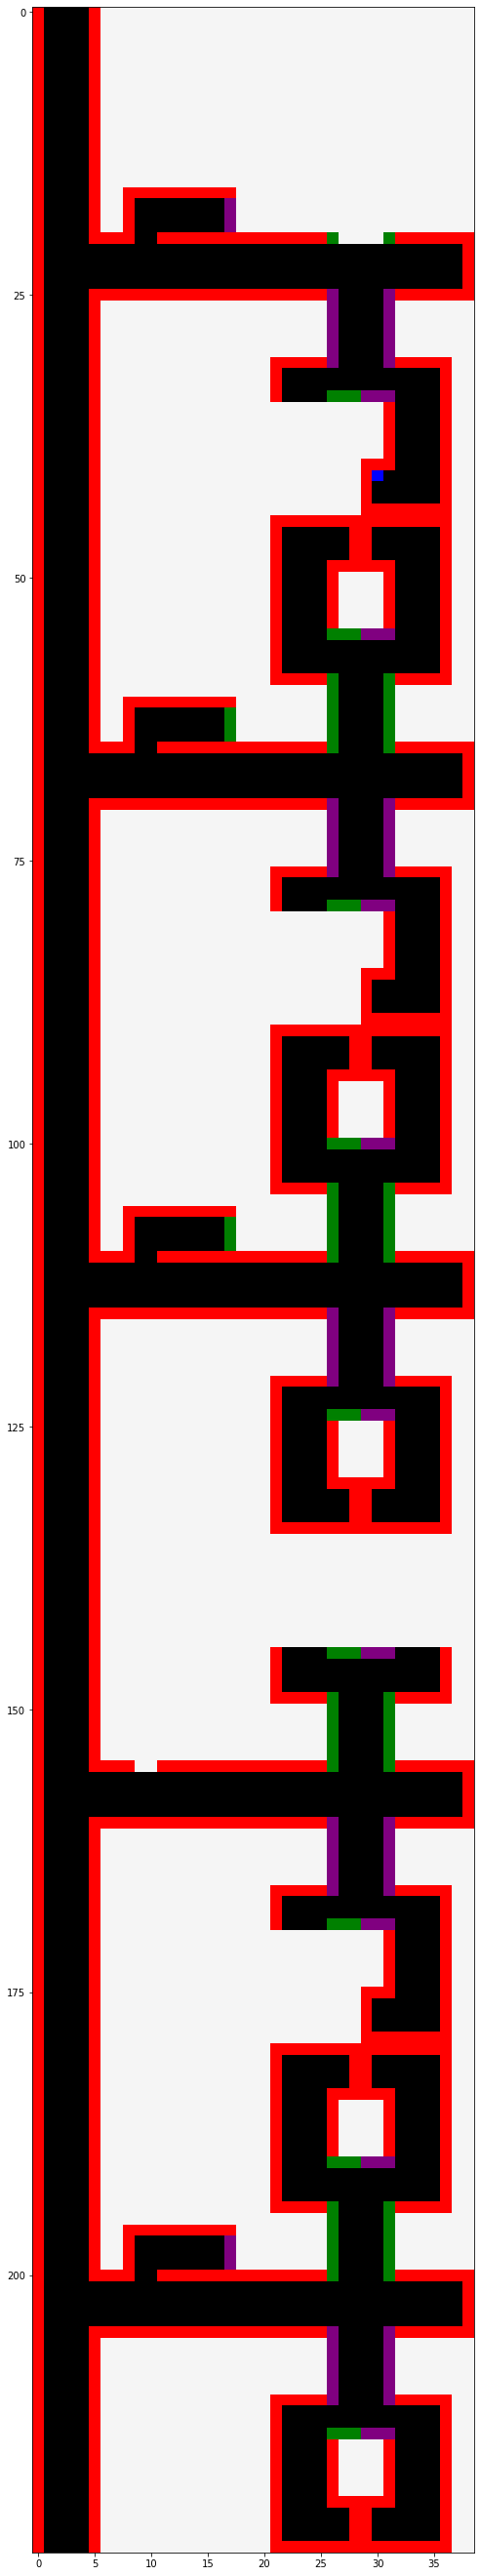

In [50]:

real_states = datas[0]['observed_states']
infos = datas[0]['info']

count = 0
full_hyps = []

# for submaps, tophyps, observed_state, prop_dictbeliefs, maps in zip(submap_steps, tophyp_steps, real_states, prop_dicts_steps):
for info, observed_state in zip(infos, real_states):  
    state_hyps = []
    print(info['beliefs'])
    for submap, hyp in zip(info['submaps'], info['tophyps']):
#         visualize(submap).show()
        WinMap = expand(submap, hyp)
        state_hyps.append(WinMap)
        print(len(hyp))
        
    sorted_hyps = sorted(list(zip(info['beliefs'], state_hyps)), key=lambda item: item[0], reverse=True)
    print(sorted_hyps)
    full_hyps.append(list(sorted_hyp[1] for sorted_hyp in sorted_hyps))
    
    print("Step: "+str(count))
    
# print(sorted_hyps.keys())
# for hyp in full_hyps[-1]:
#     vis_single_grid(hyp)
gen_gif([real_states[-1]], hyps=full_hyps)

    
    
    

## Multi cell type

20
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
[]
[]
Step: 0
Reading Images..
Saving...


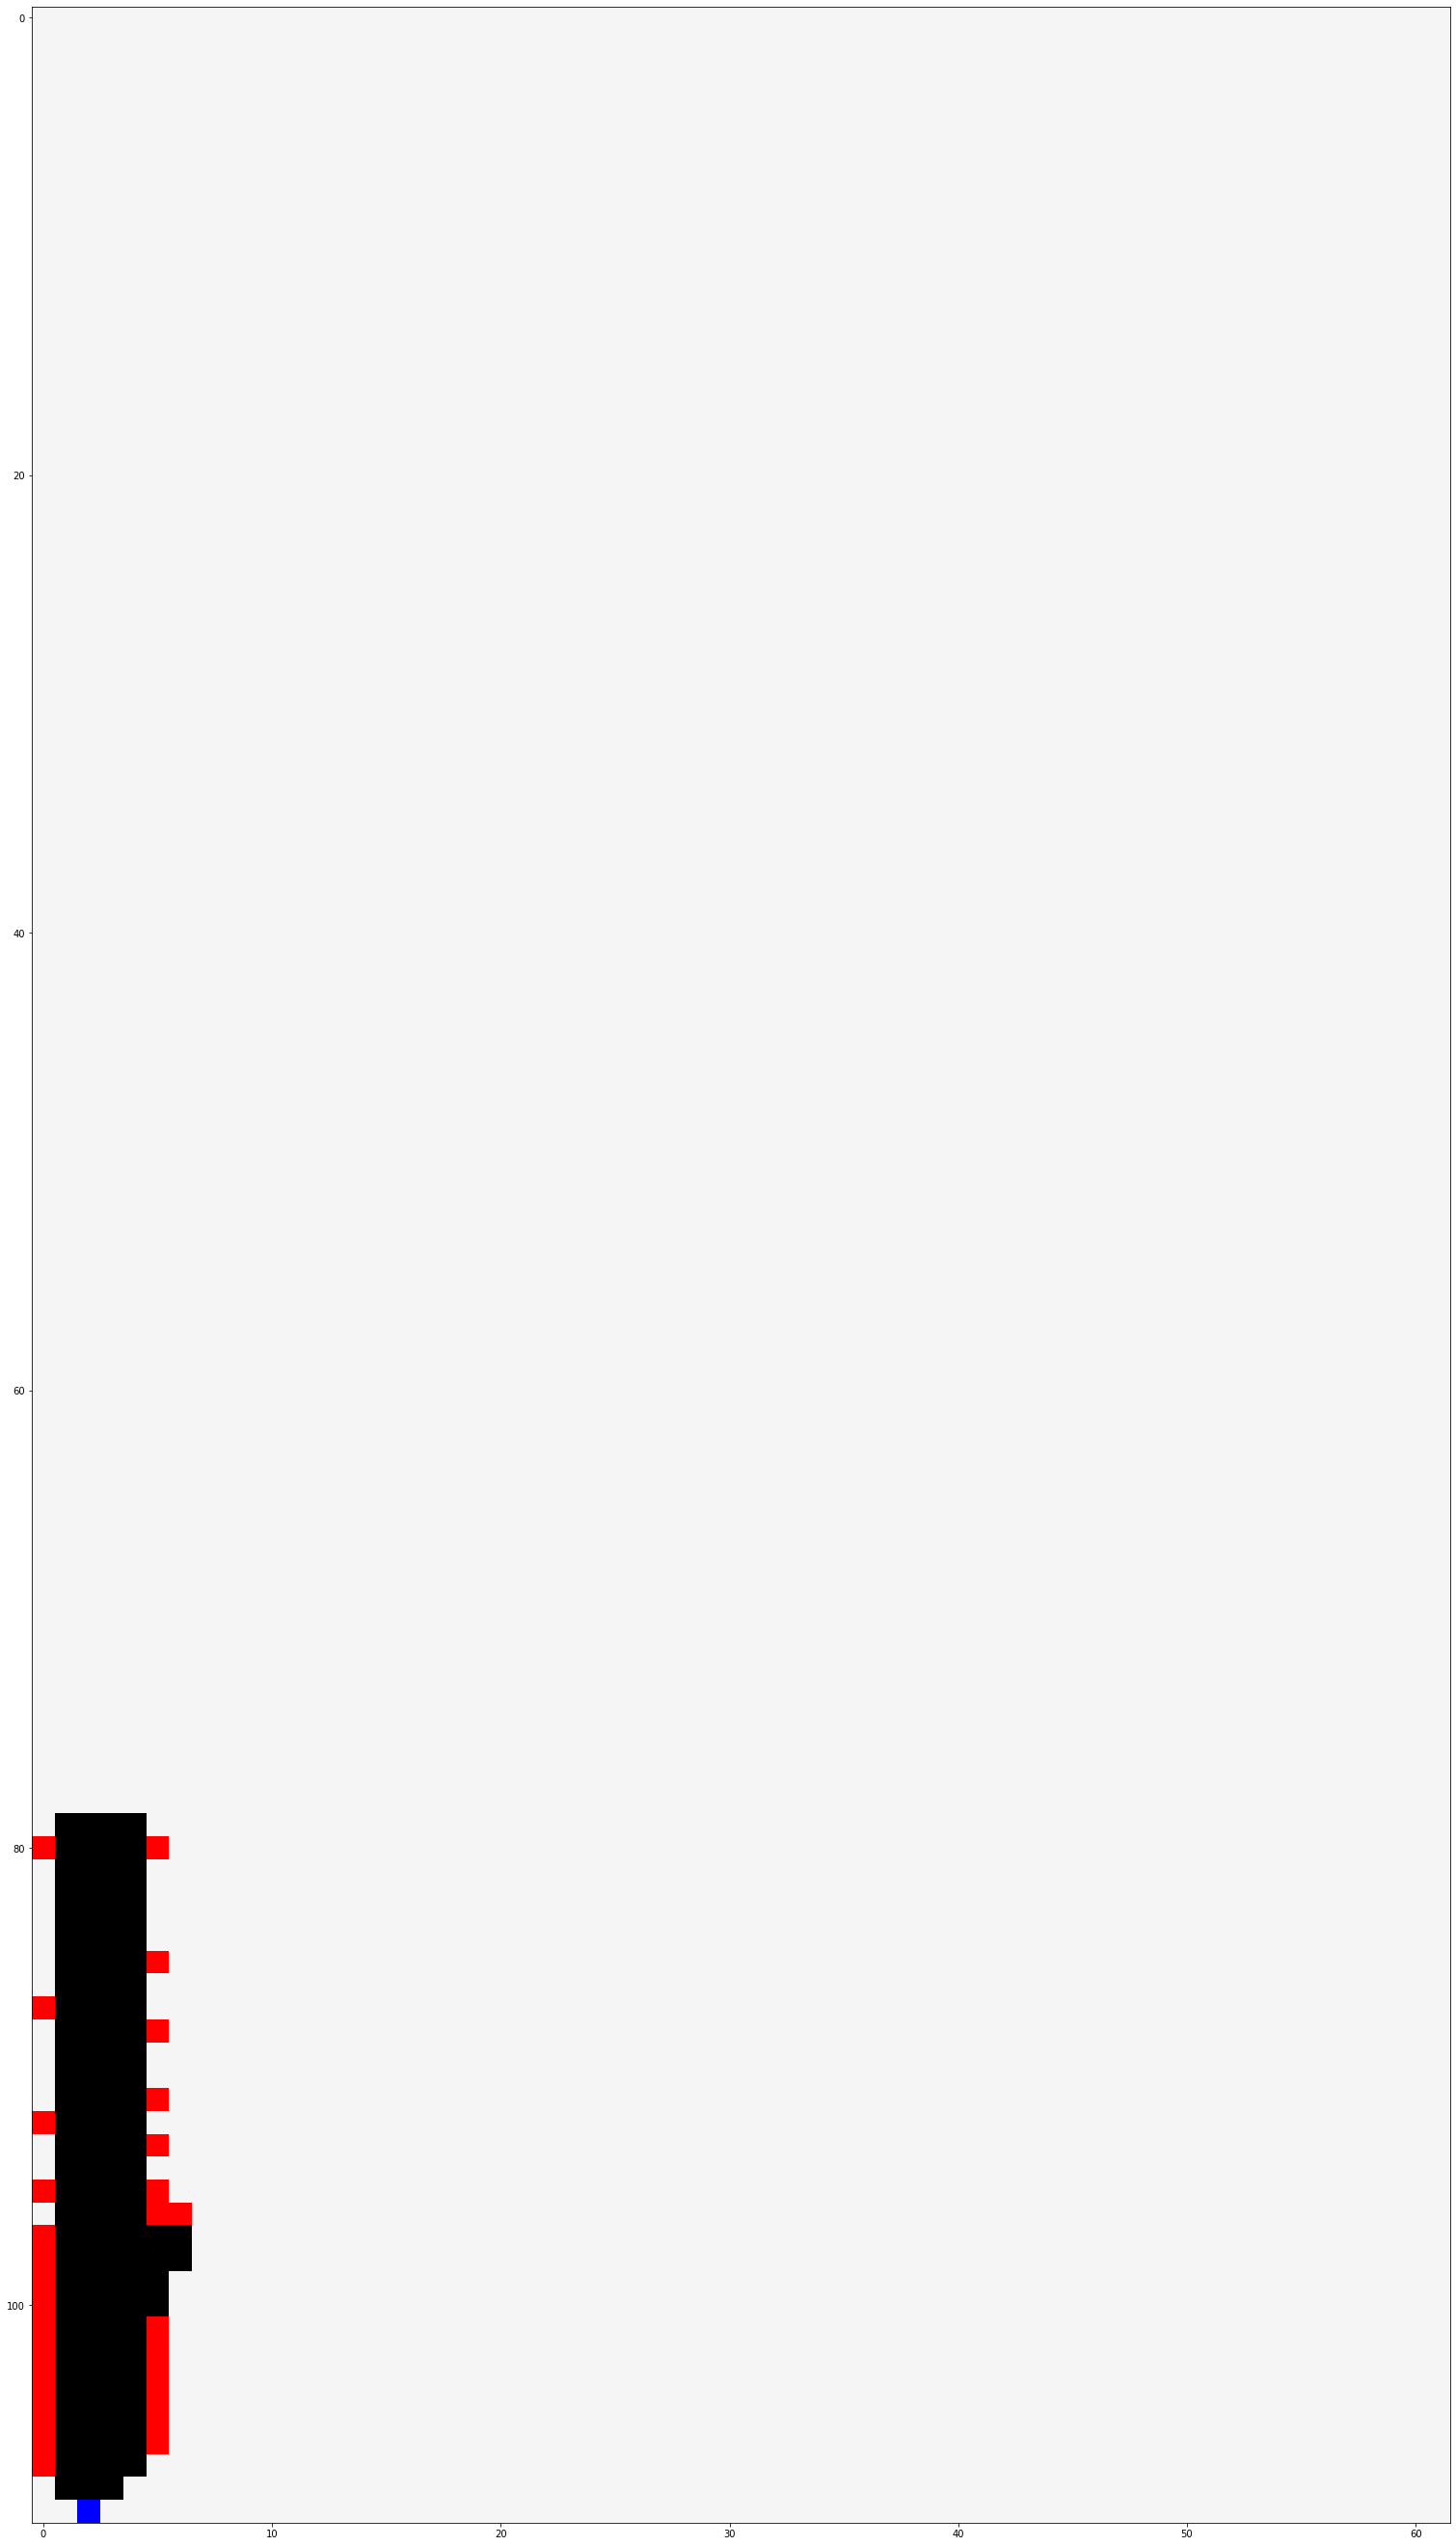

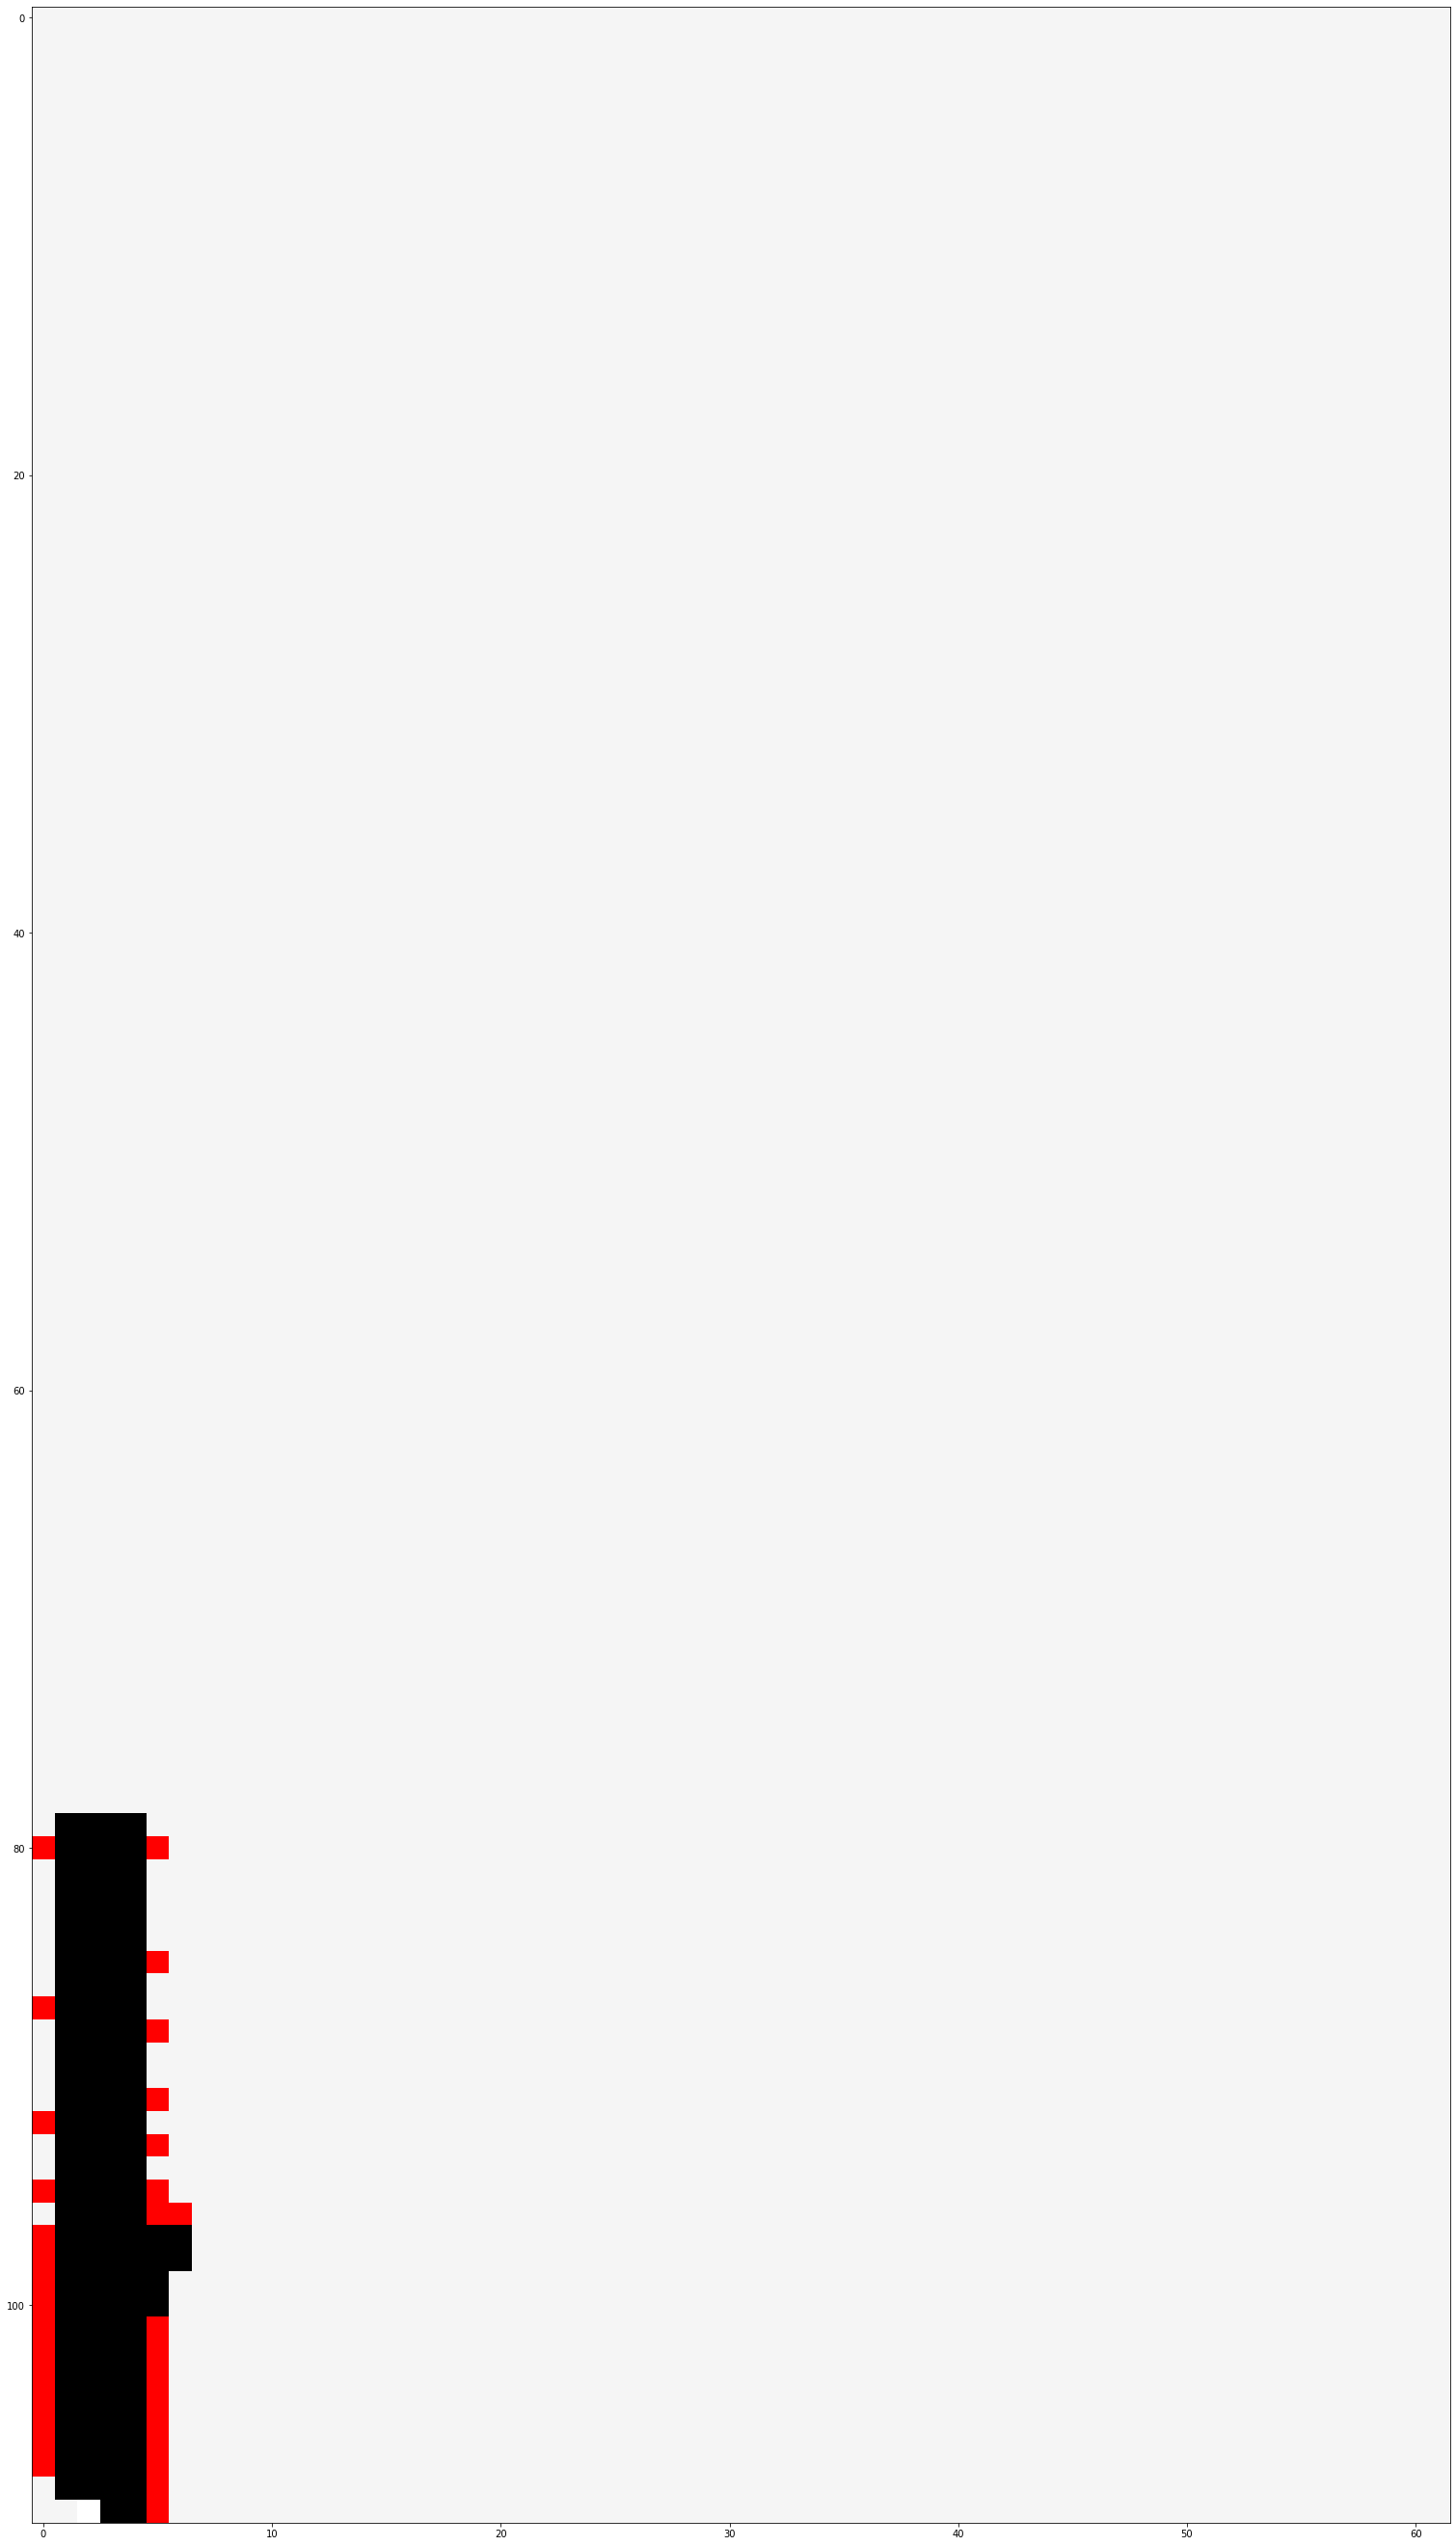

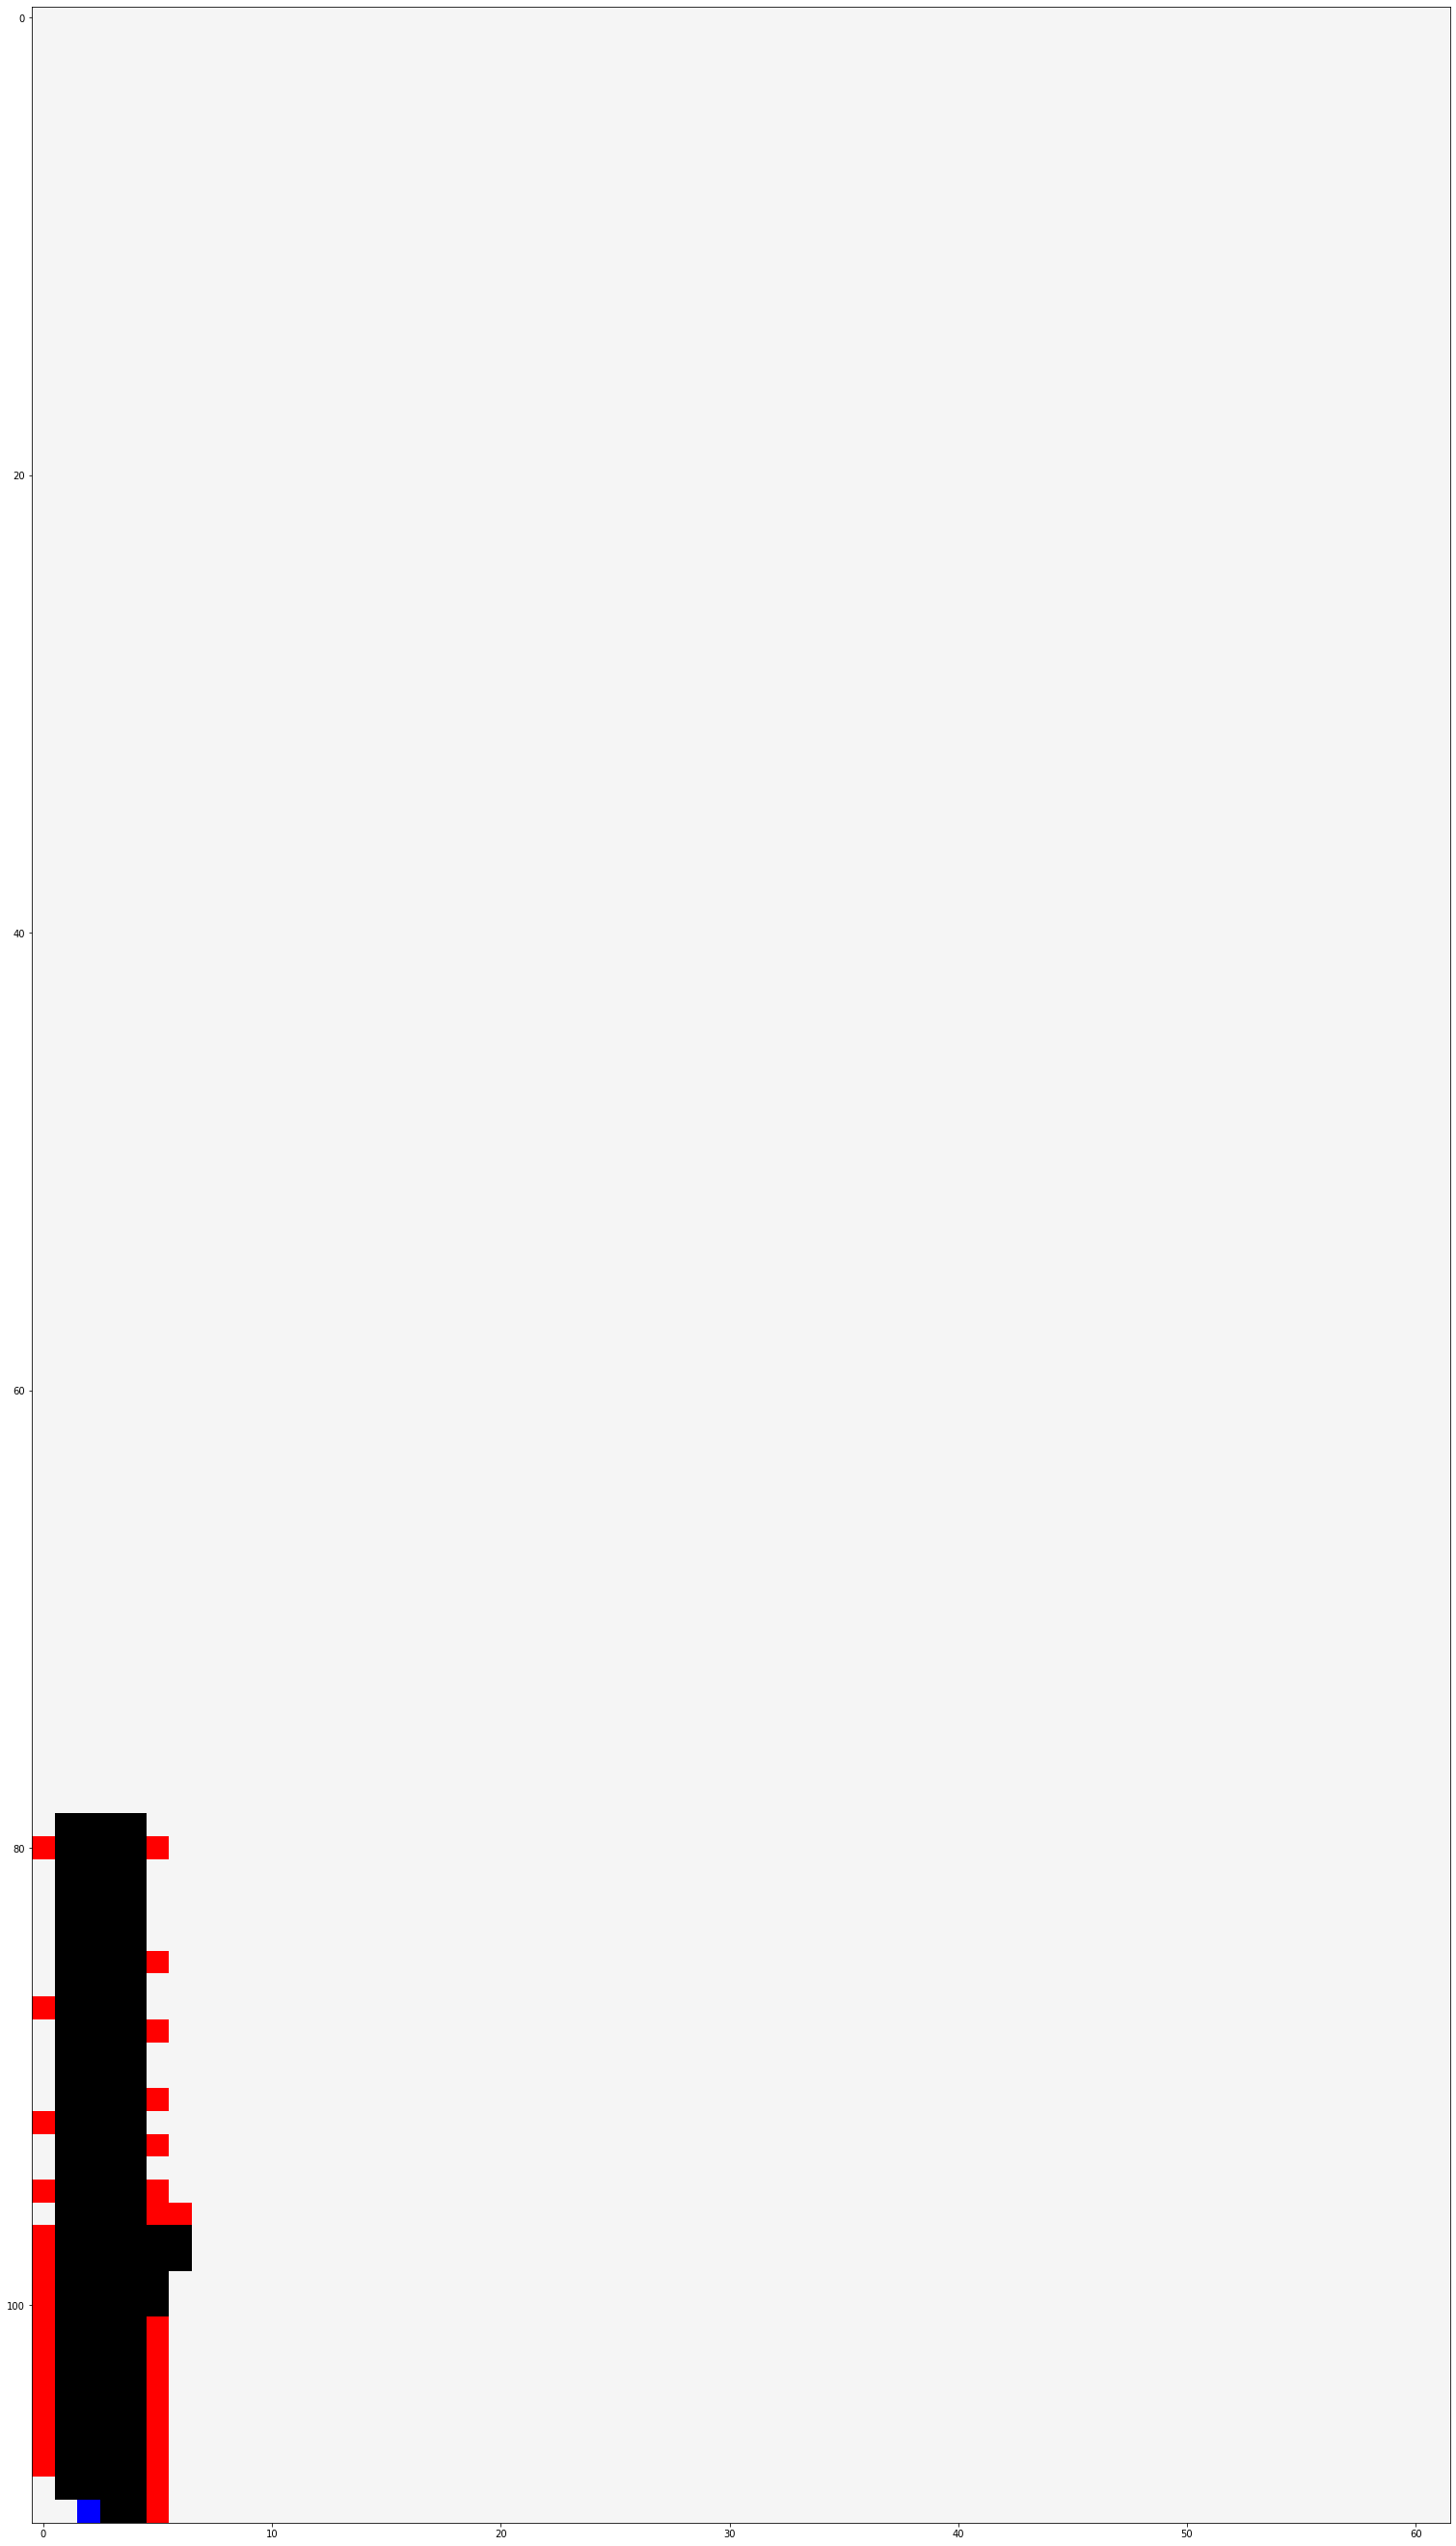

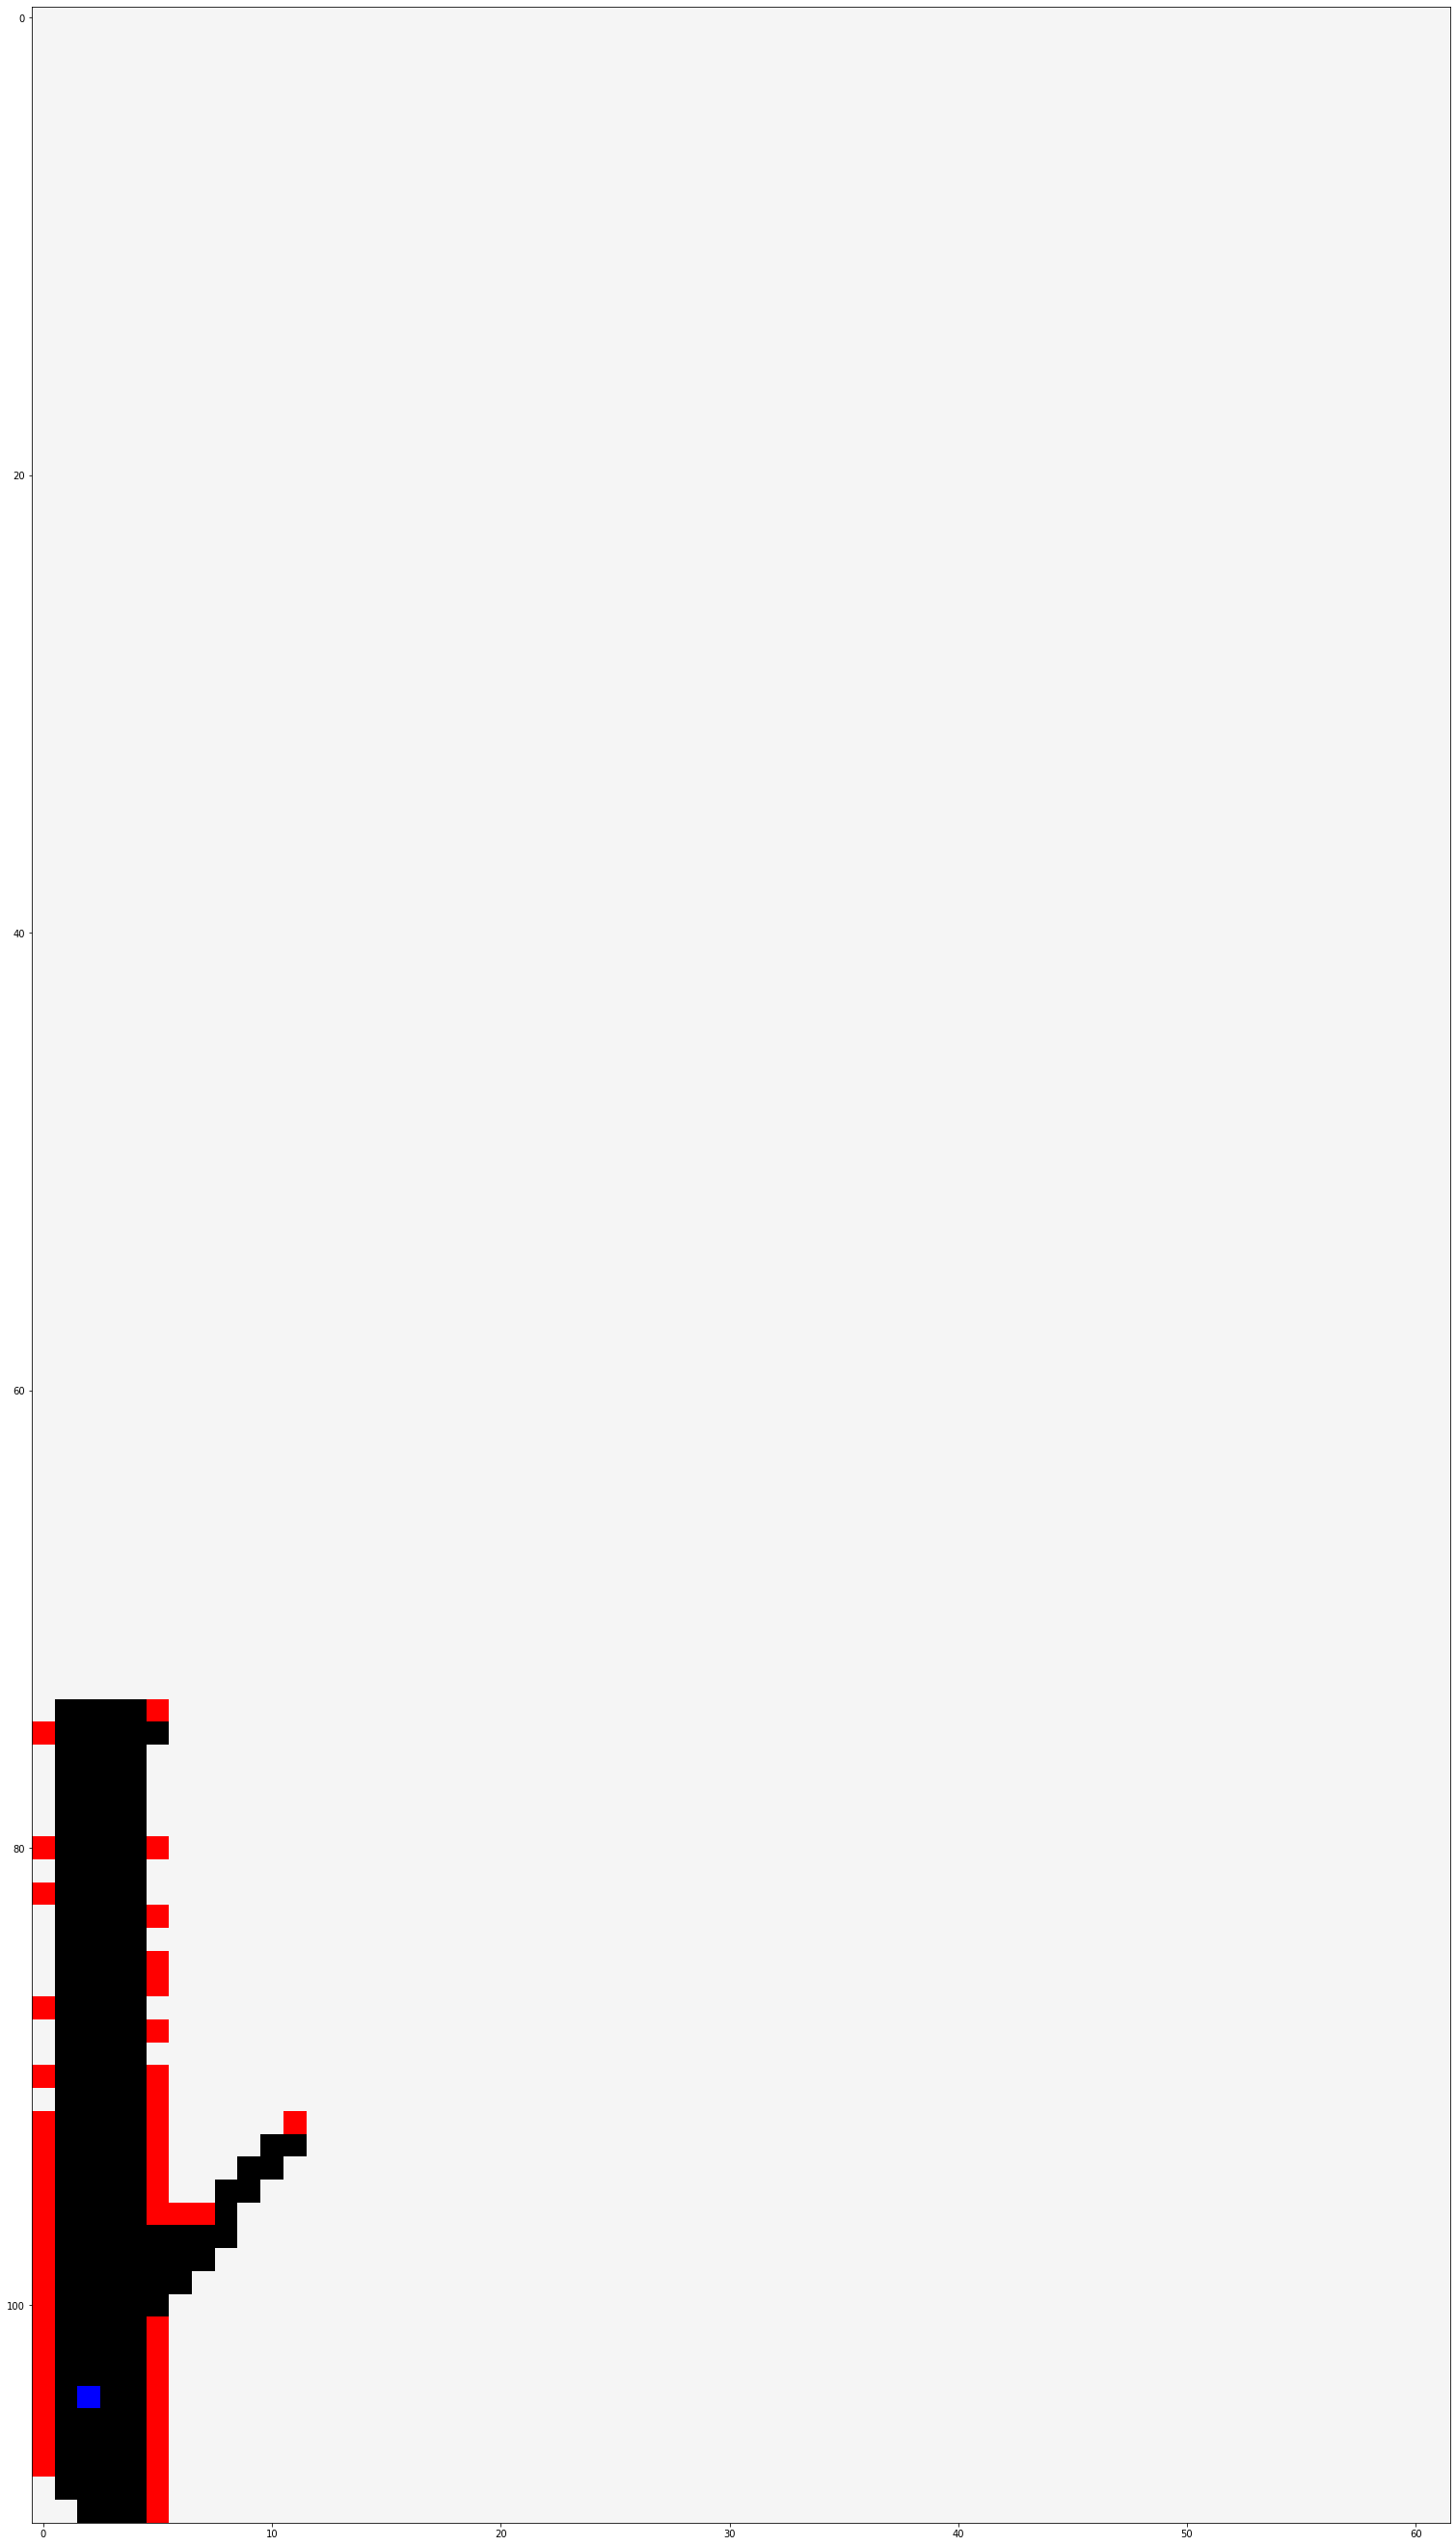

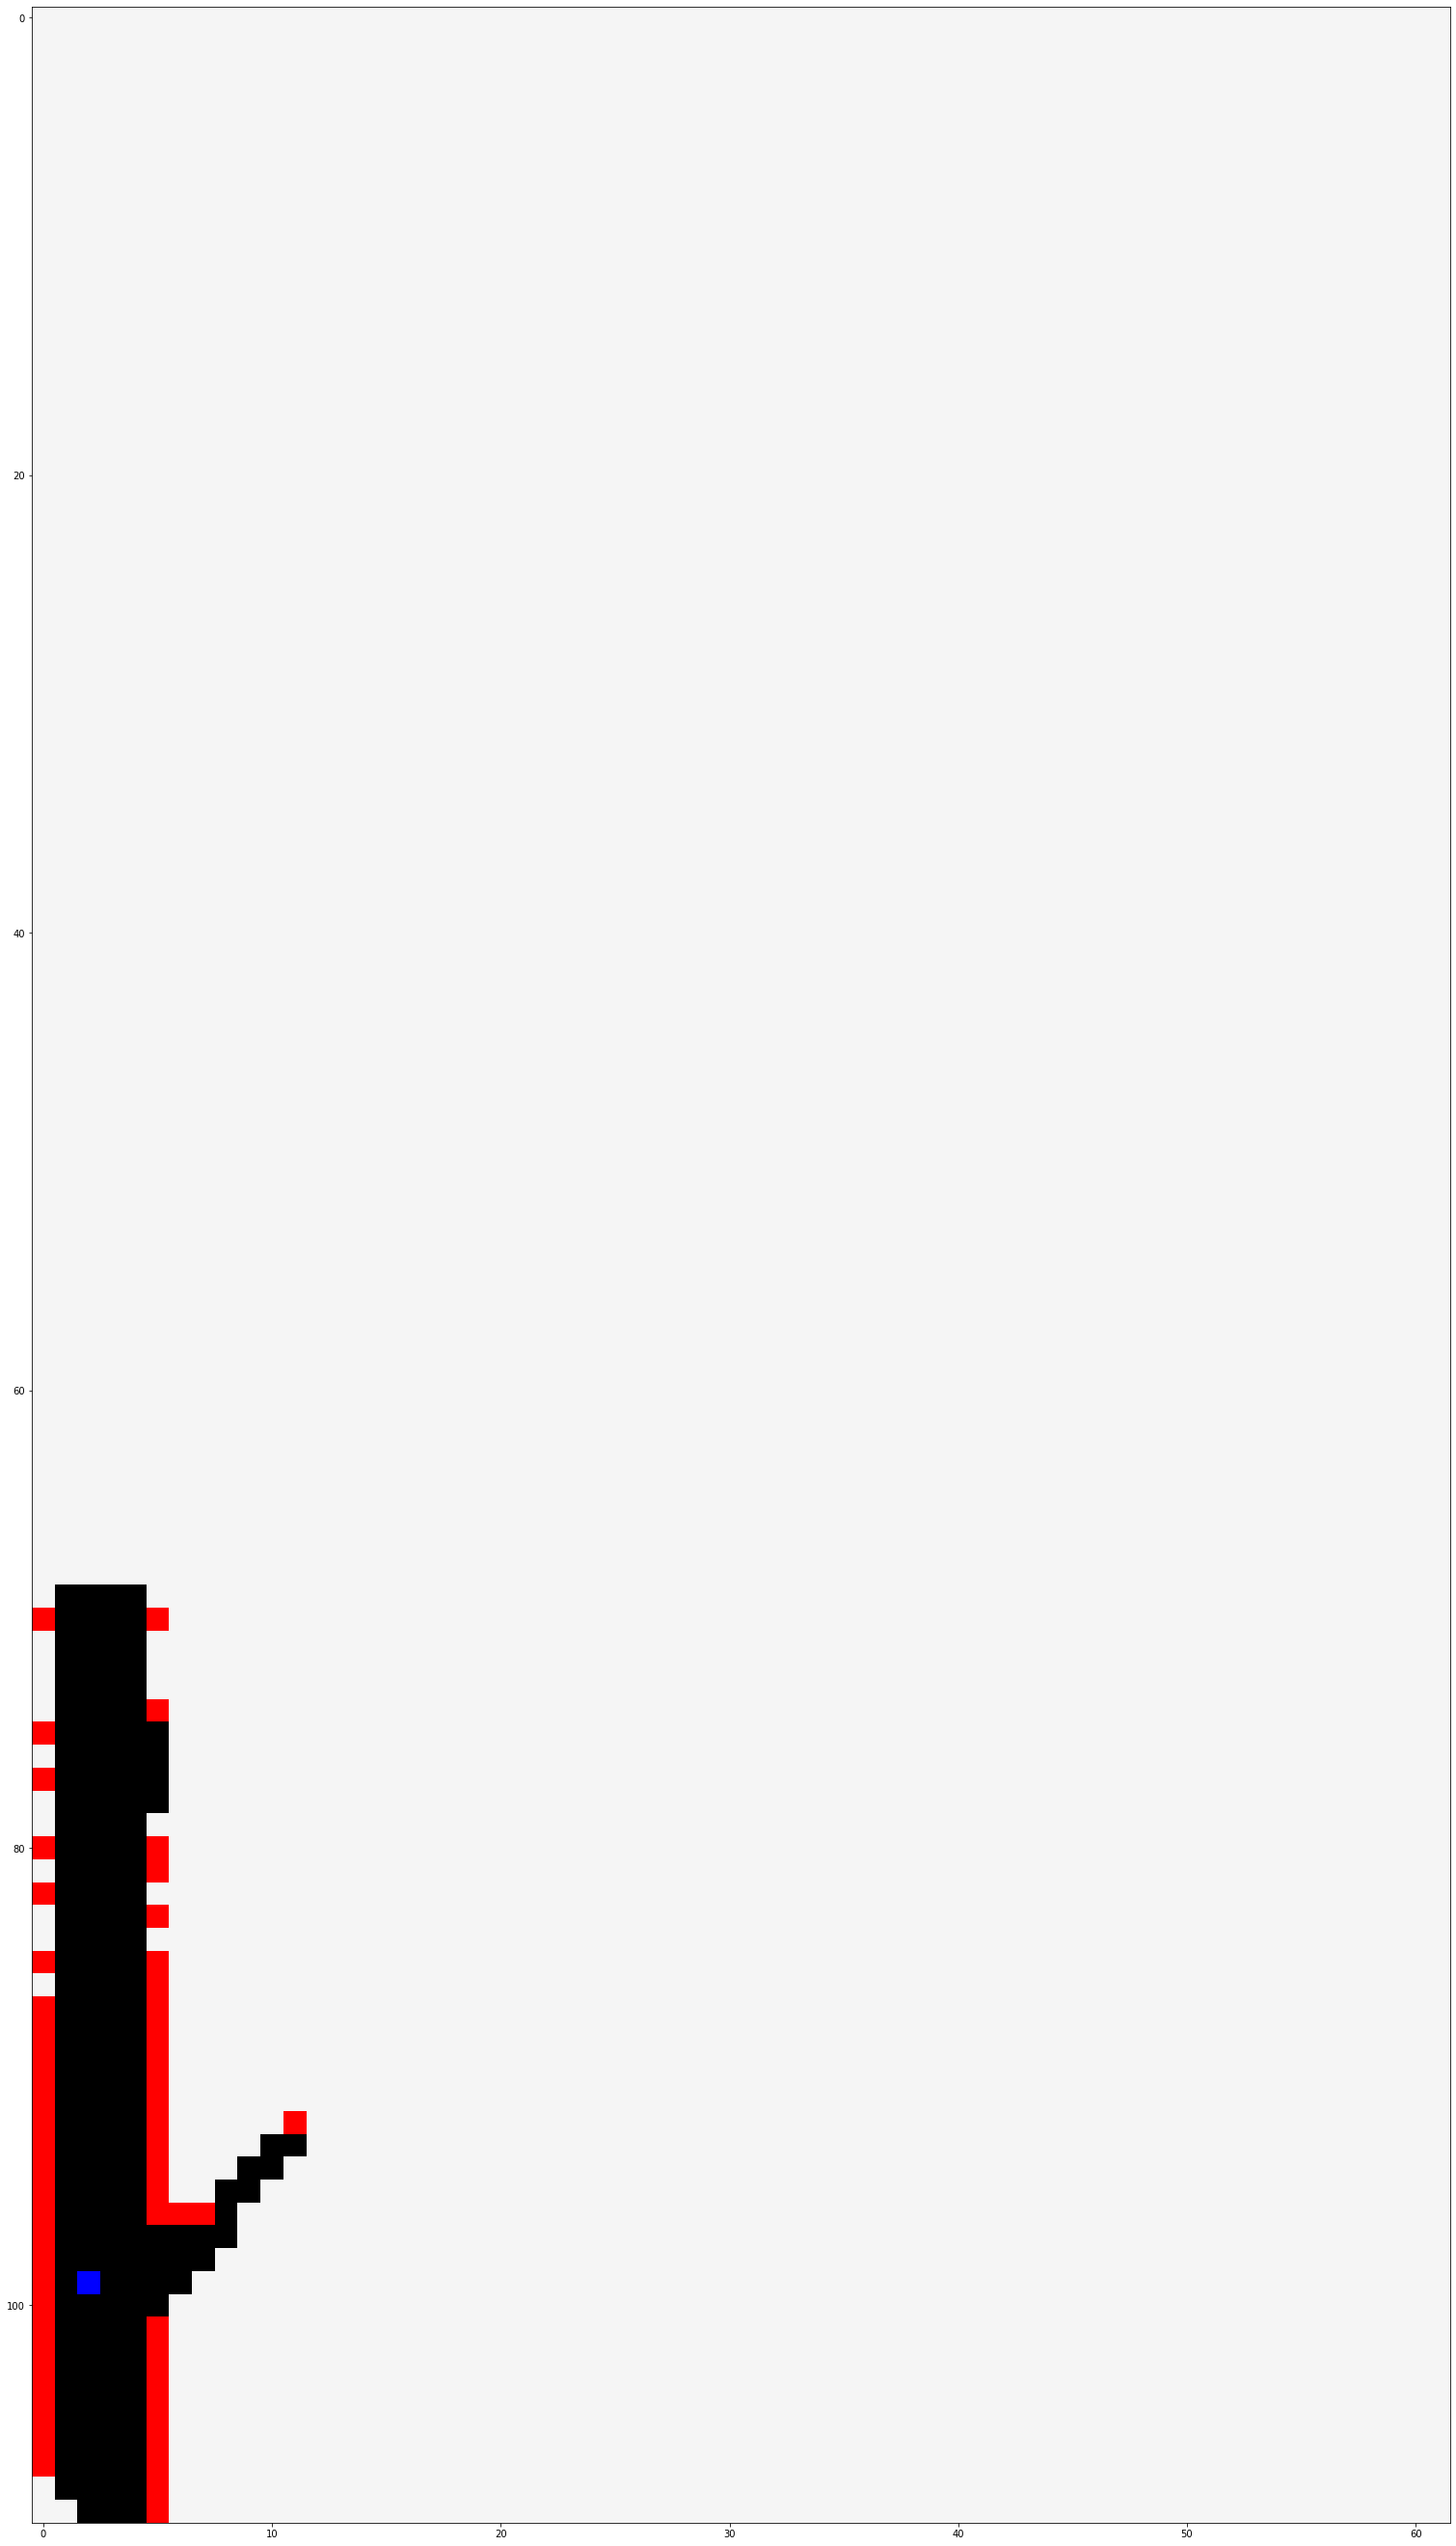

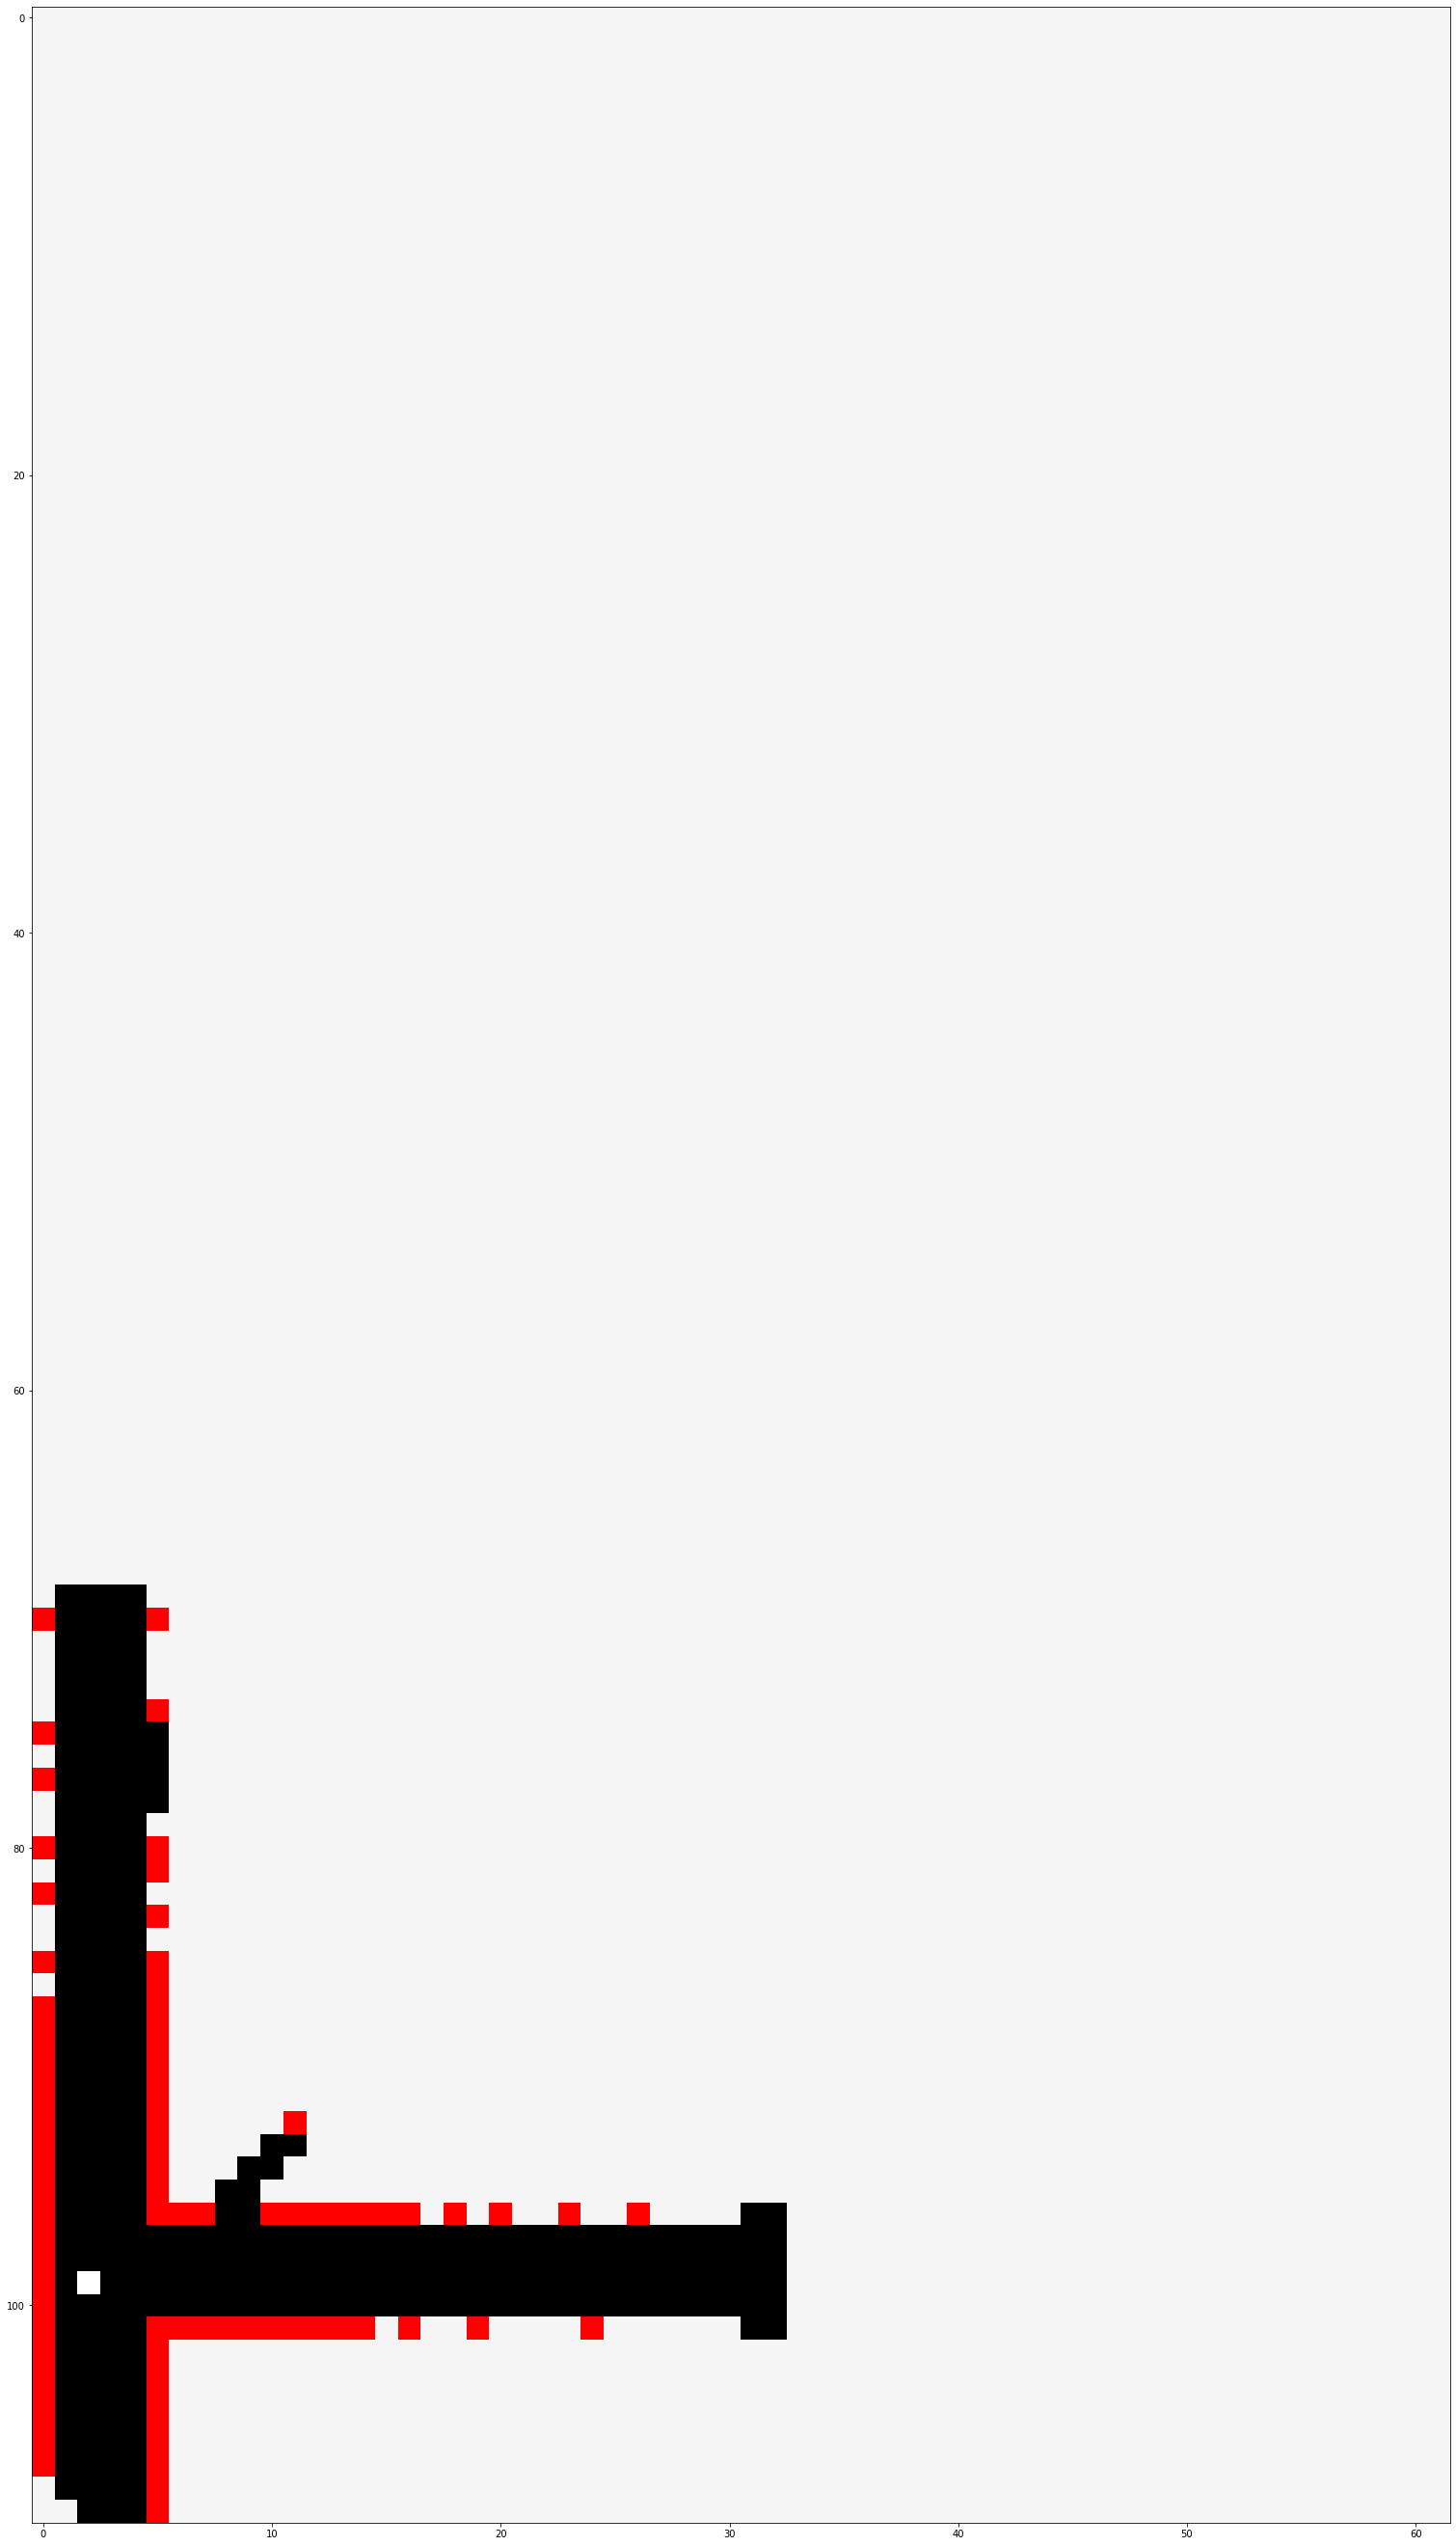

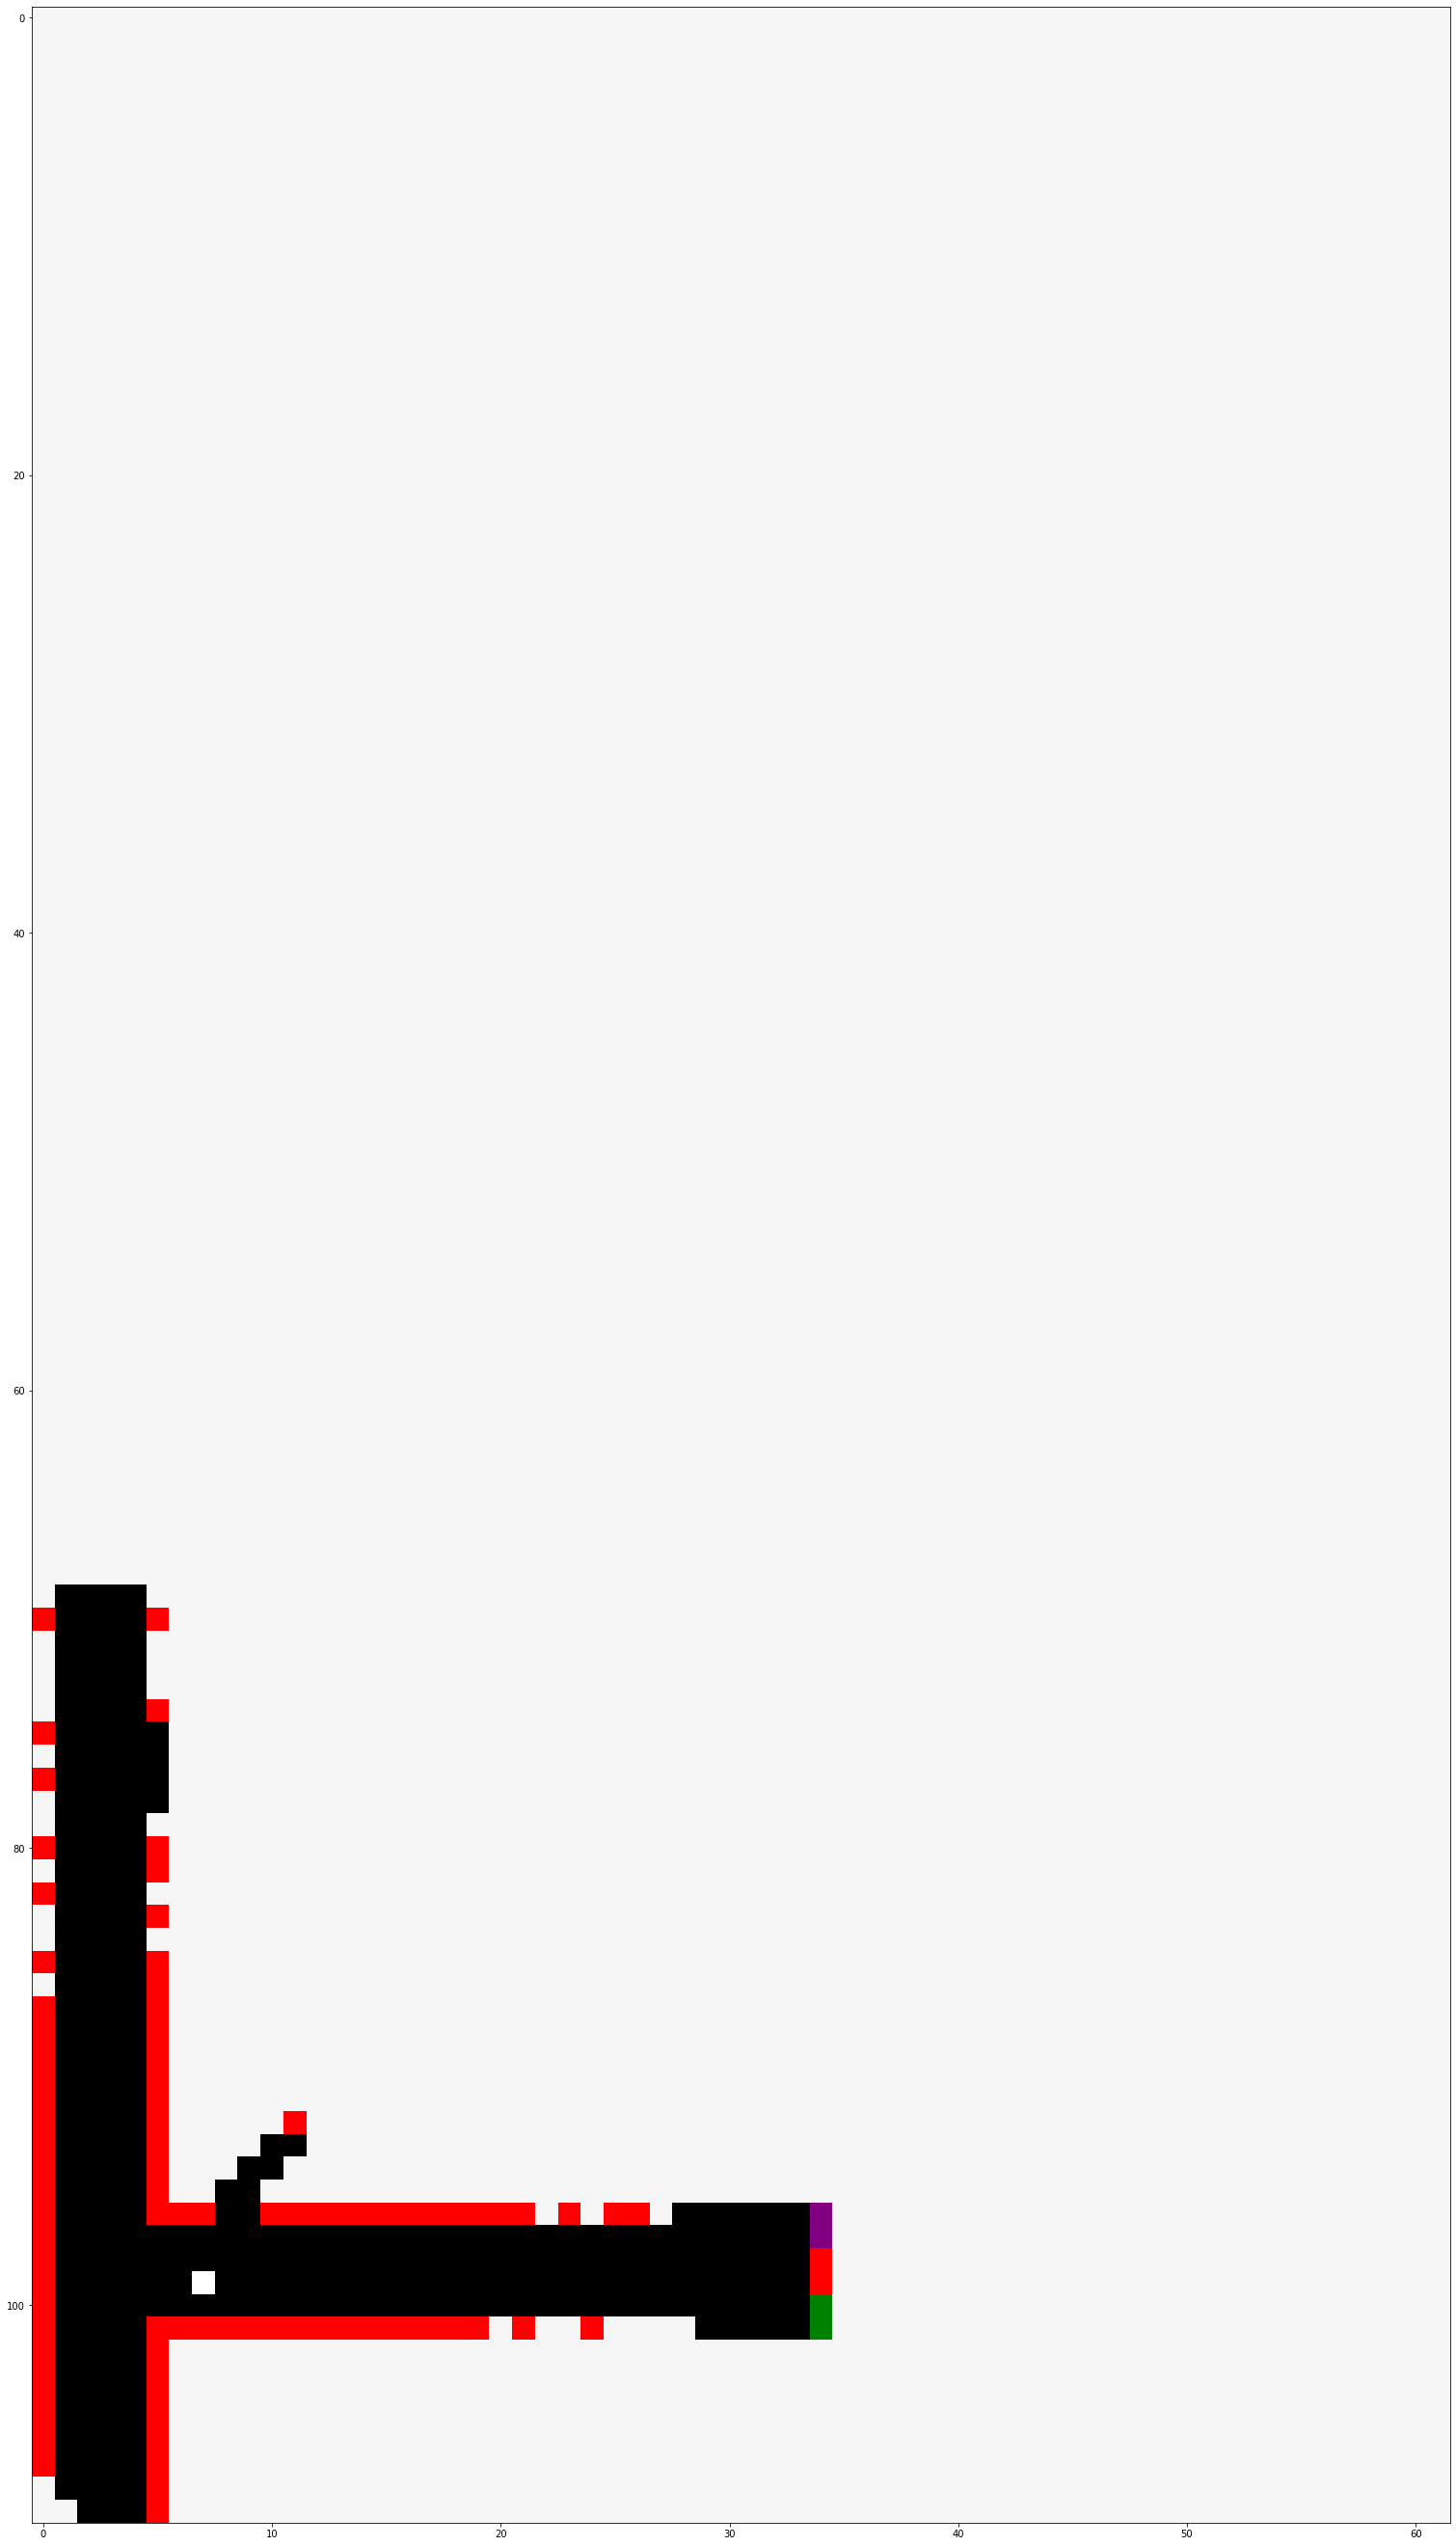

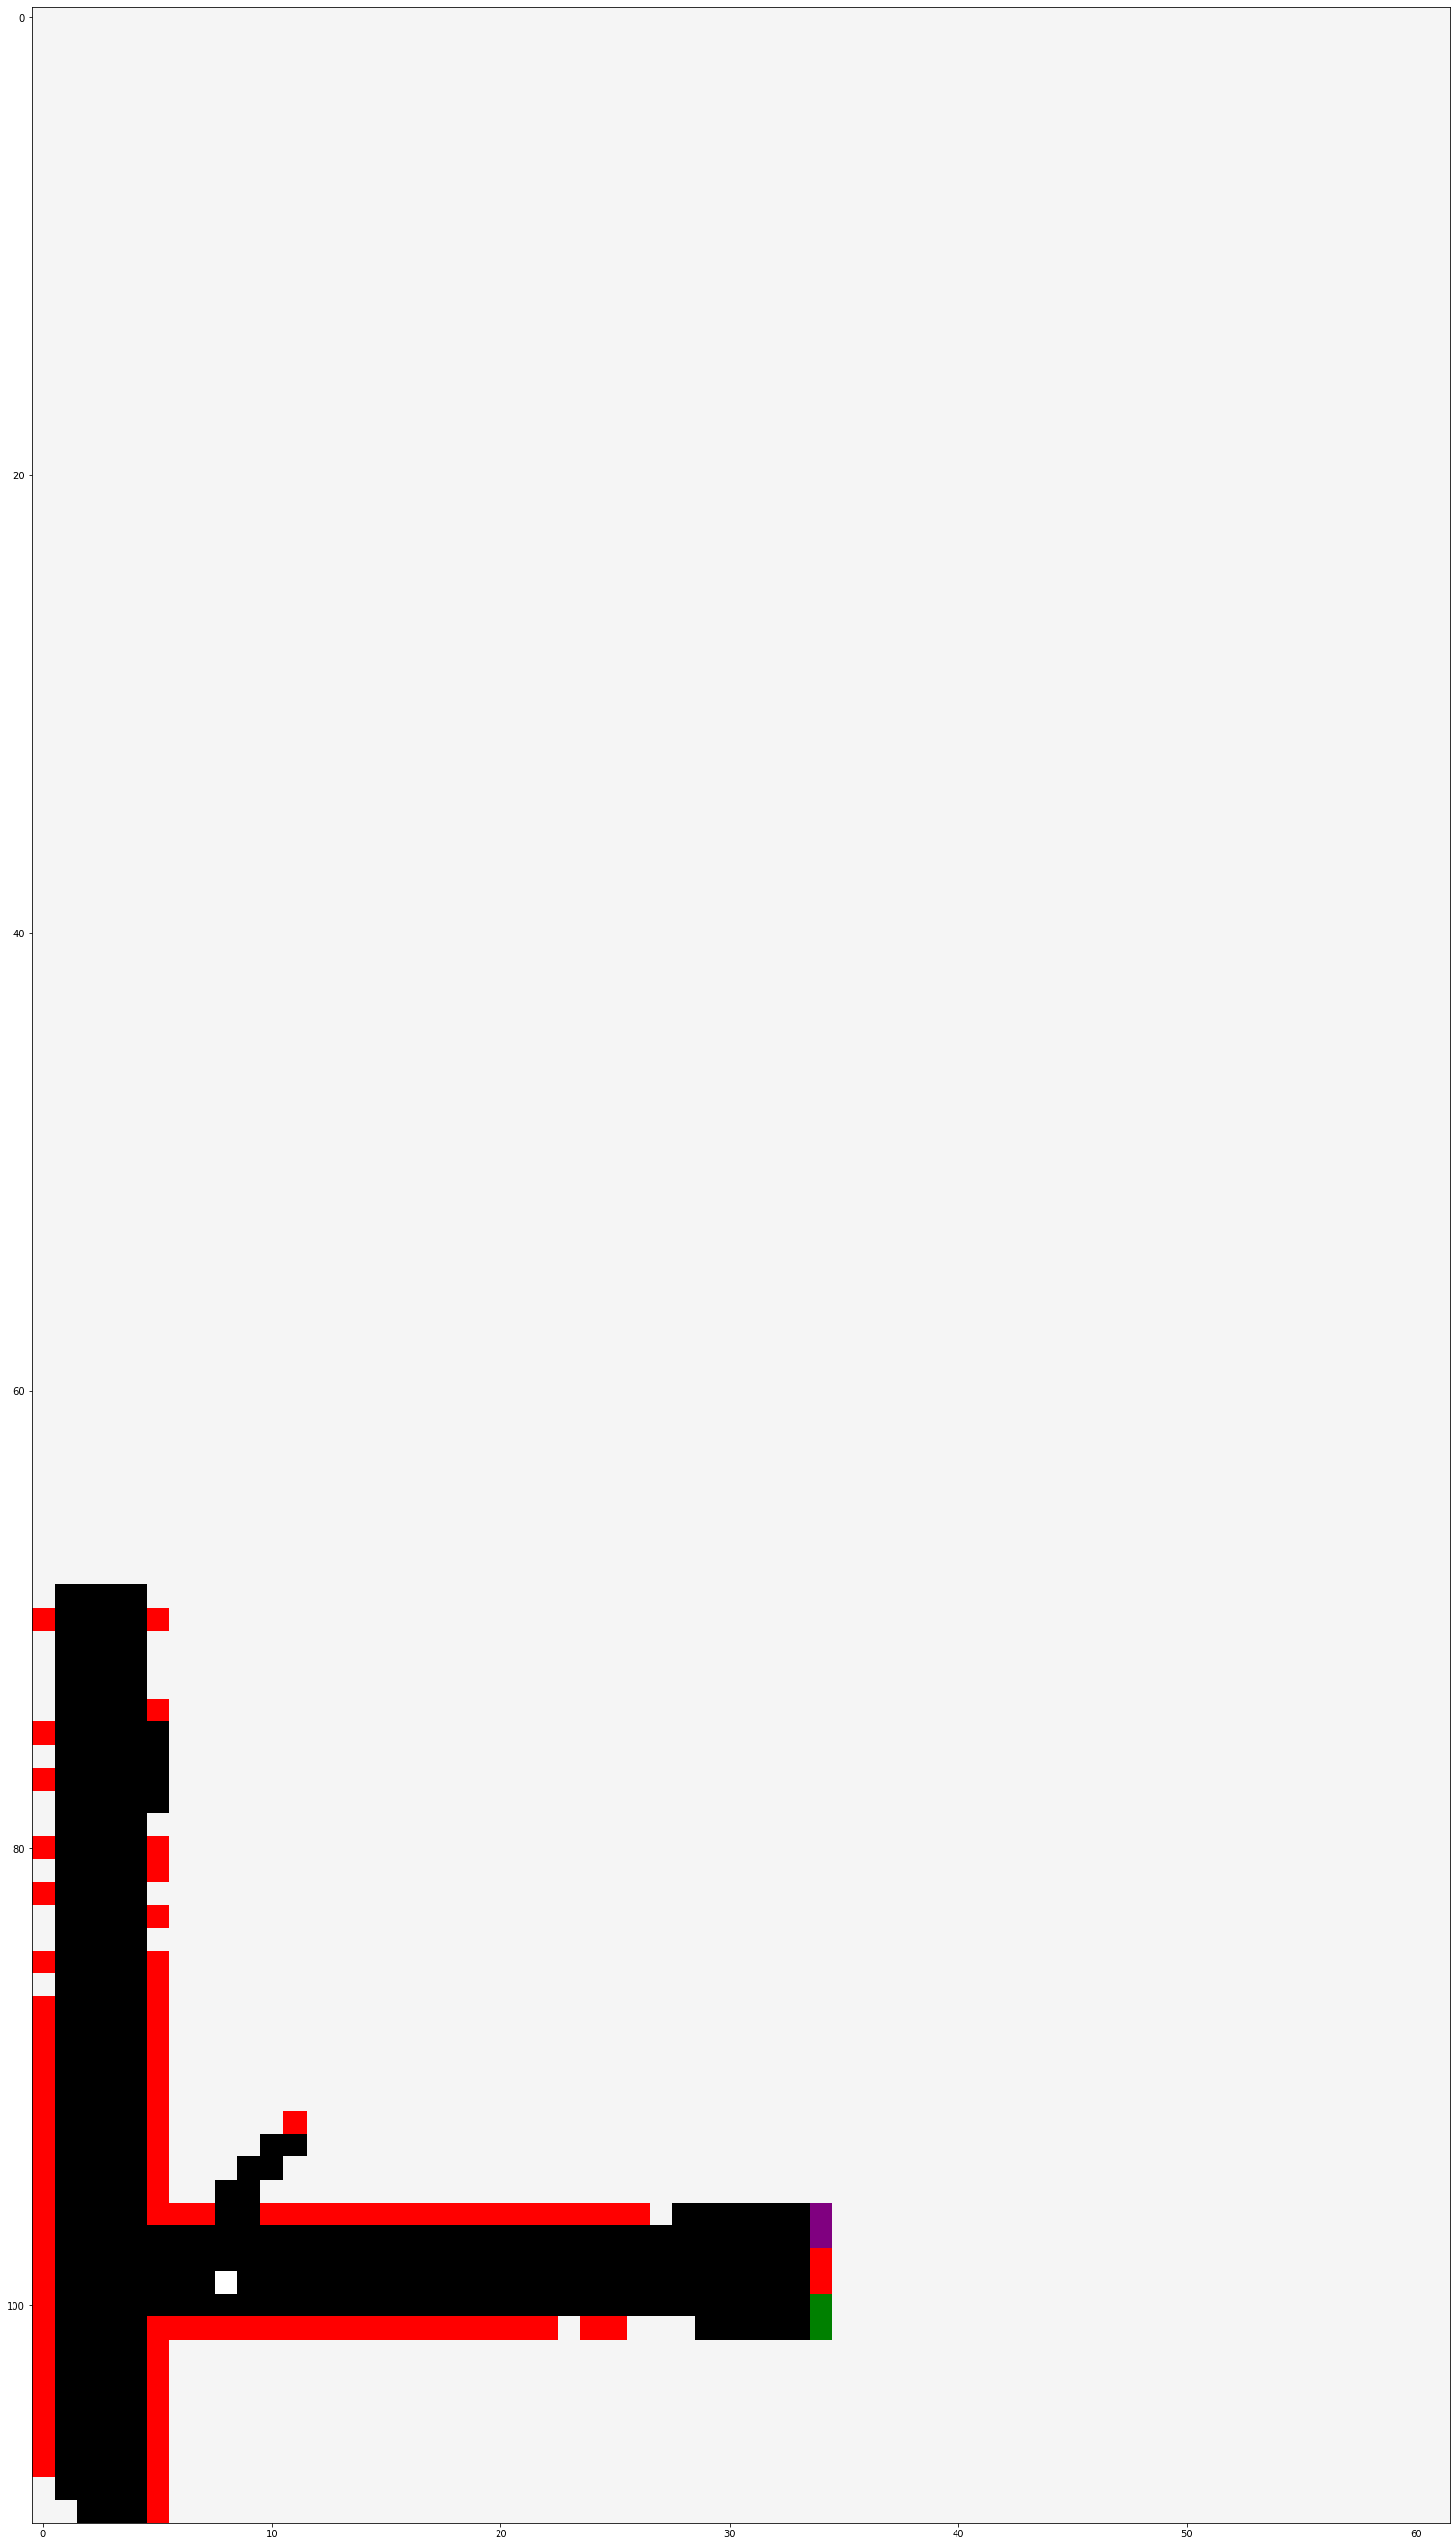

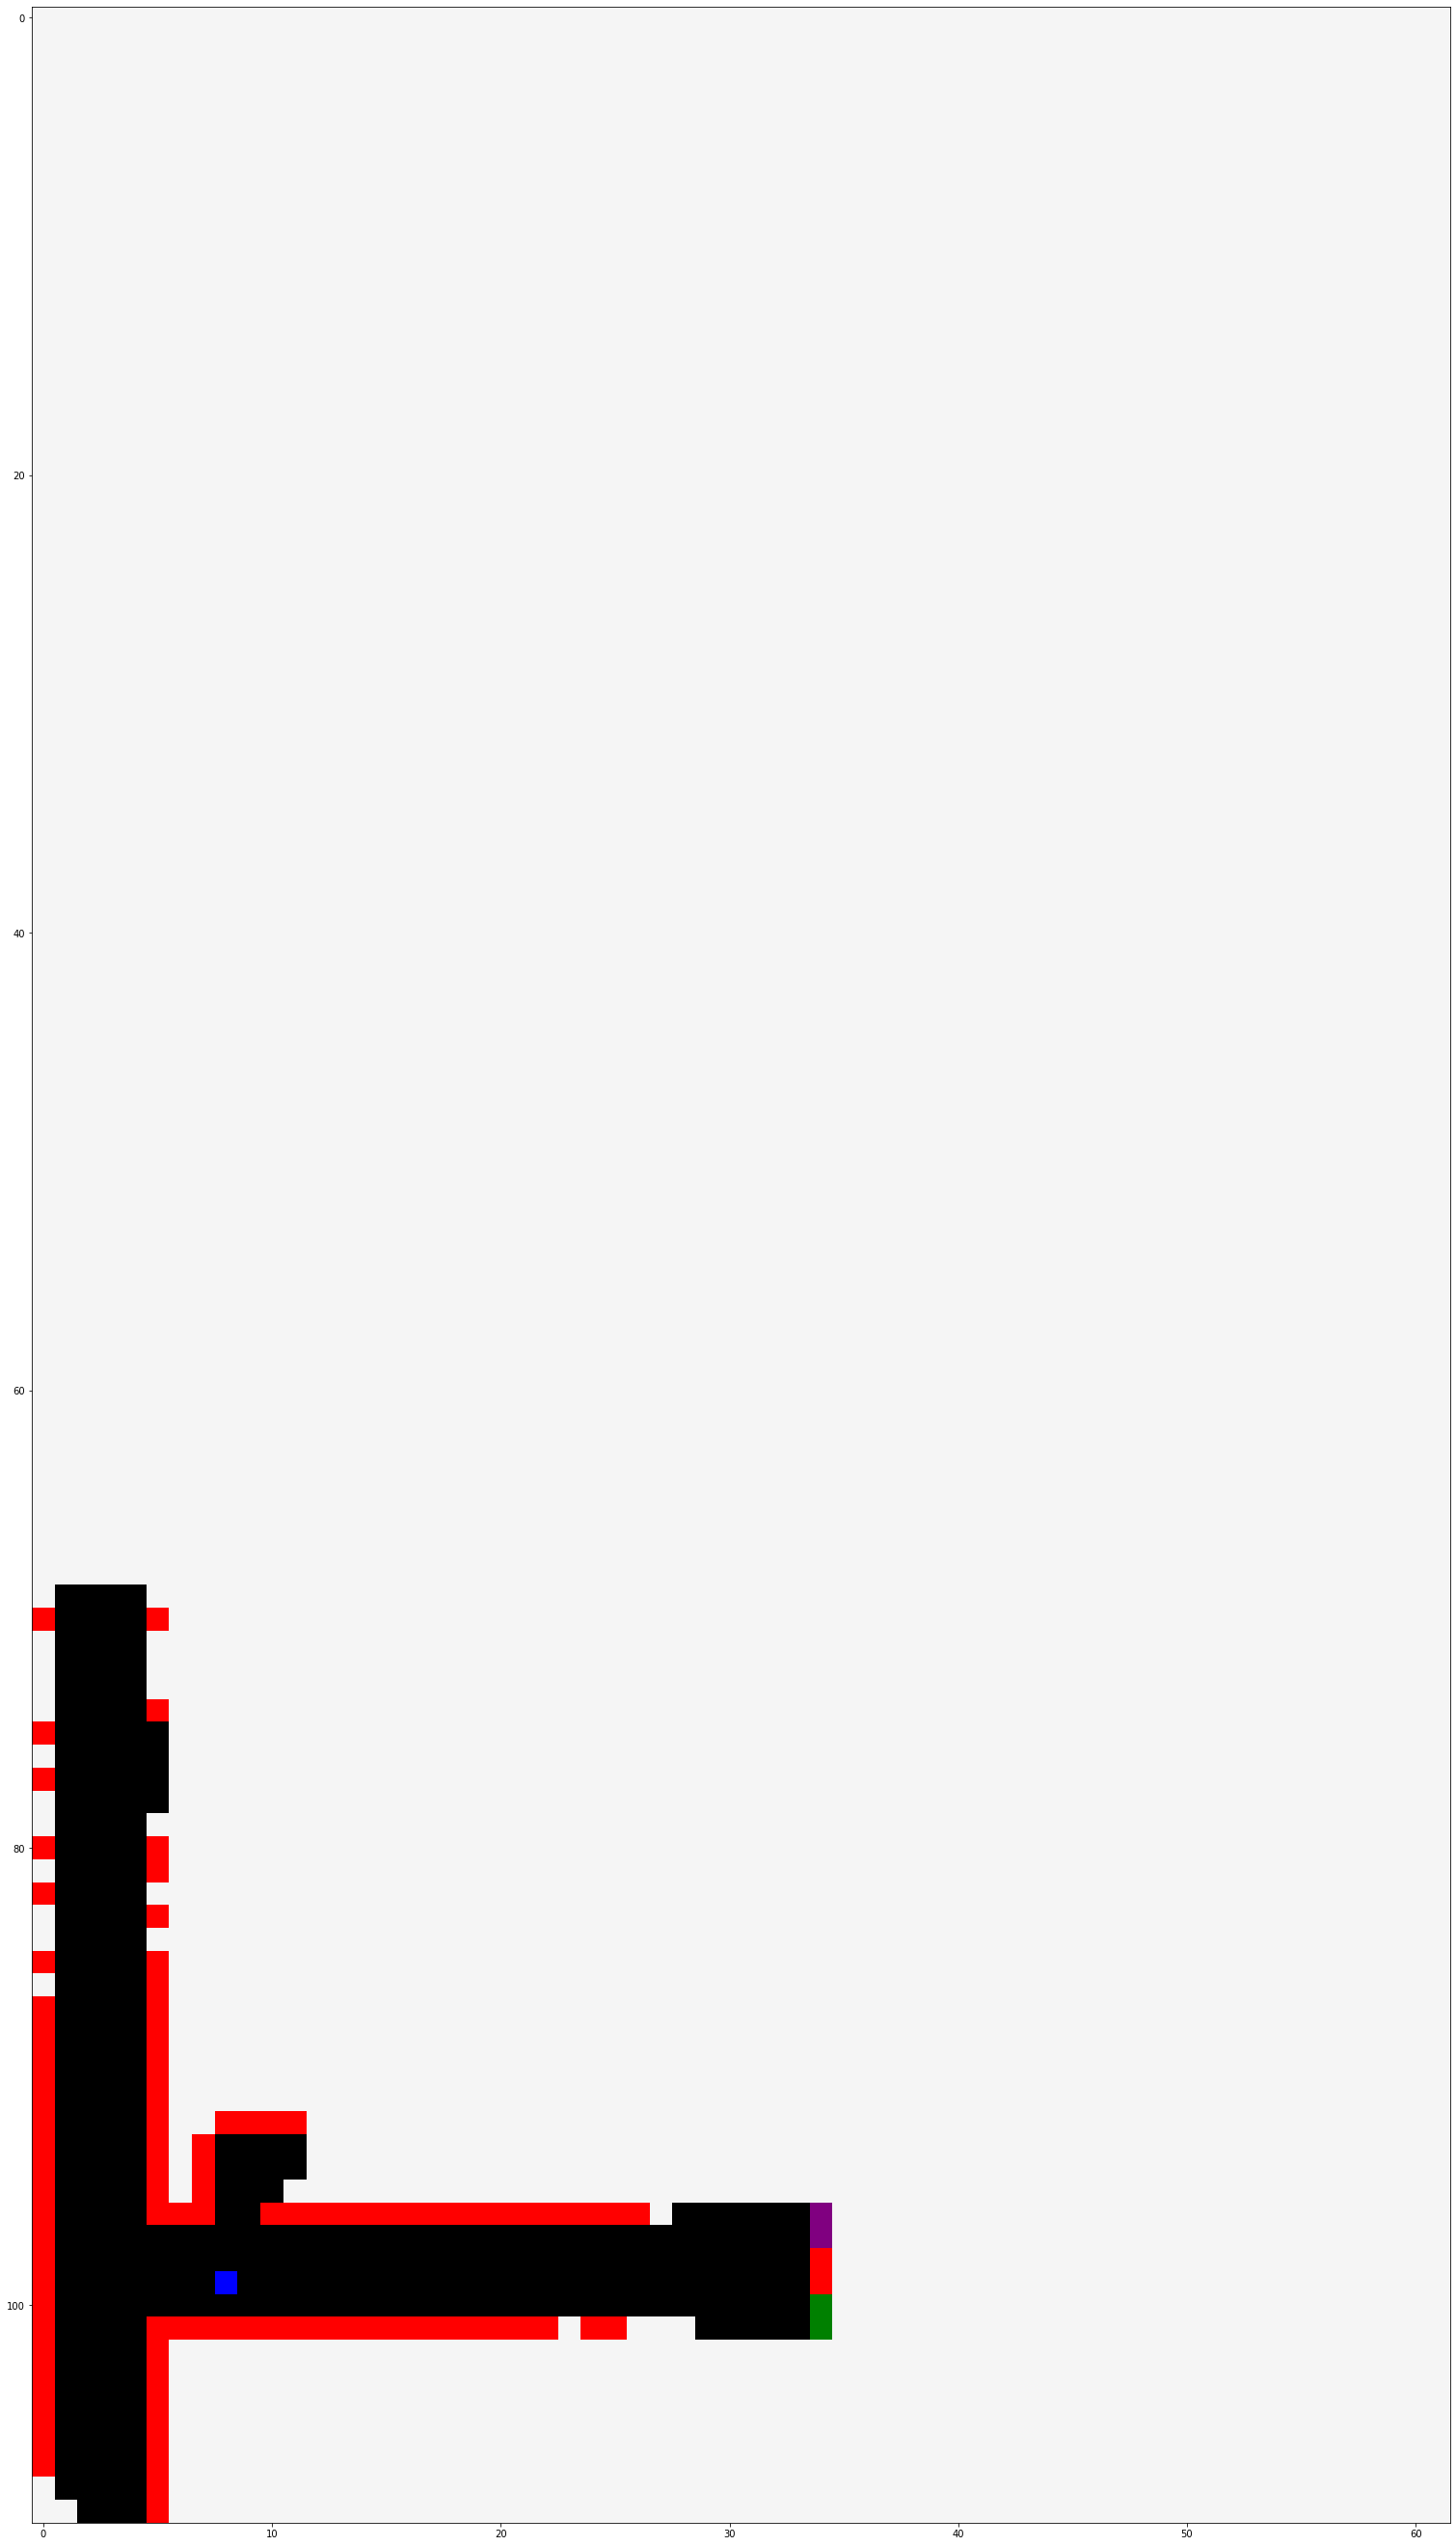

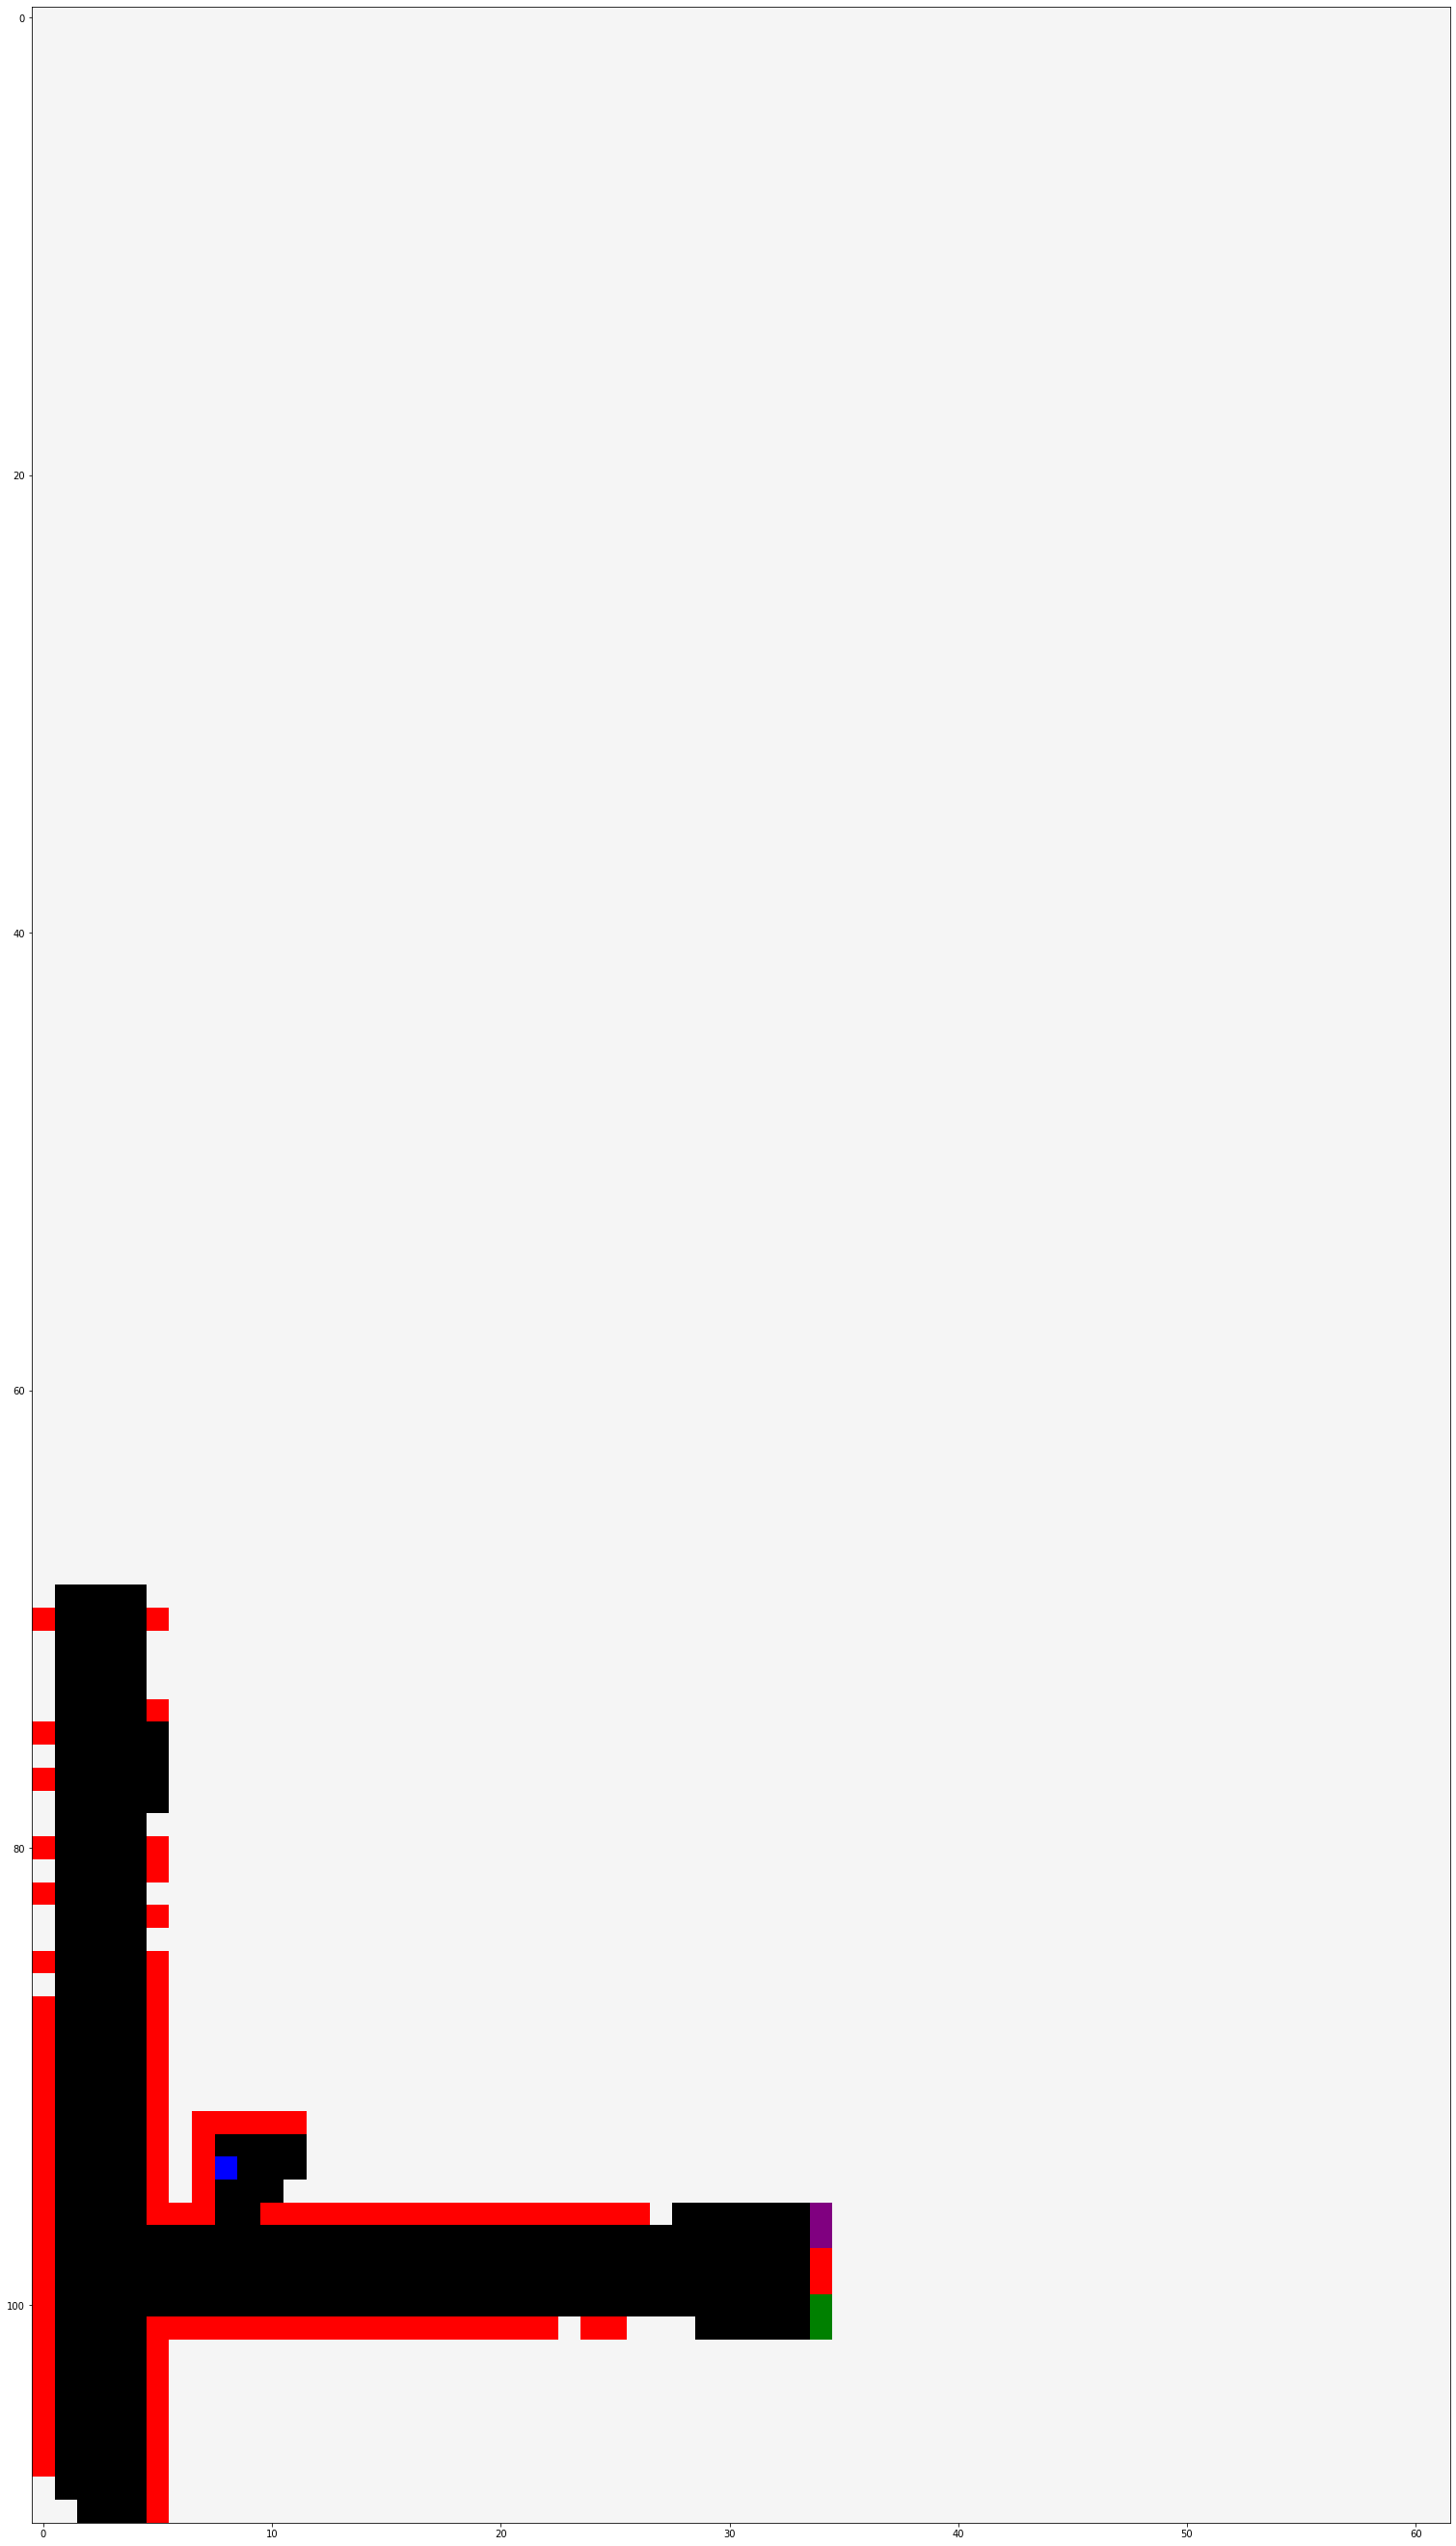

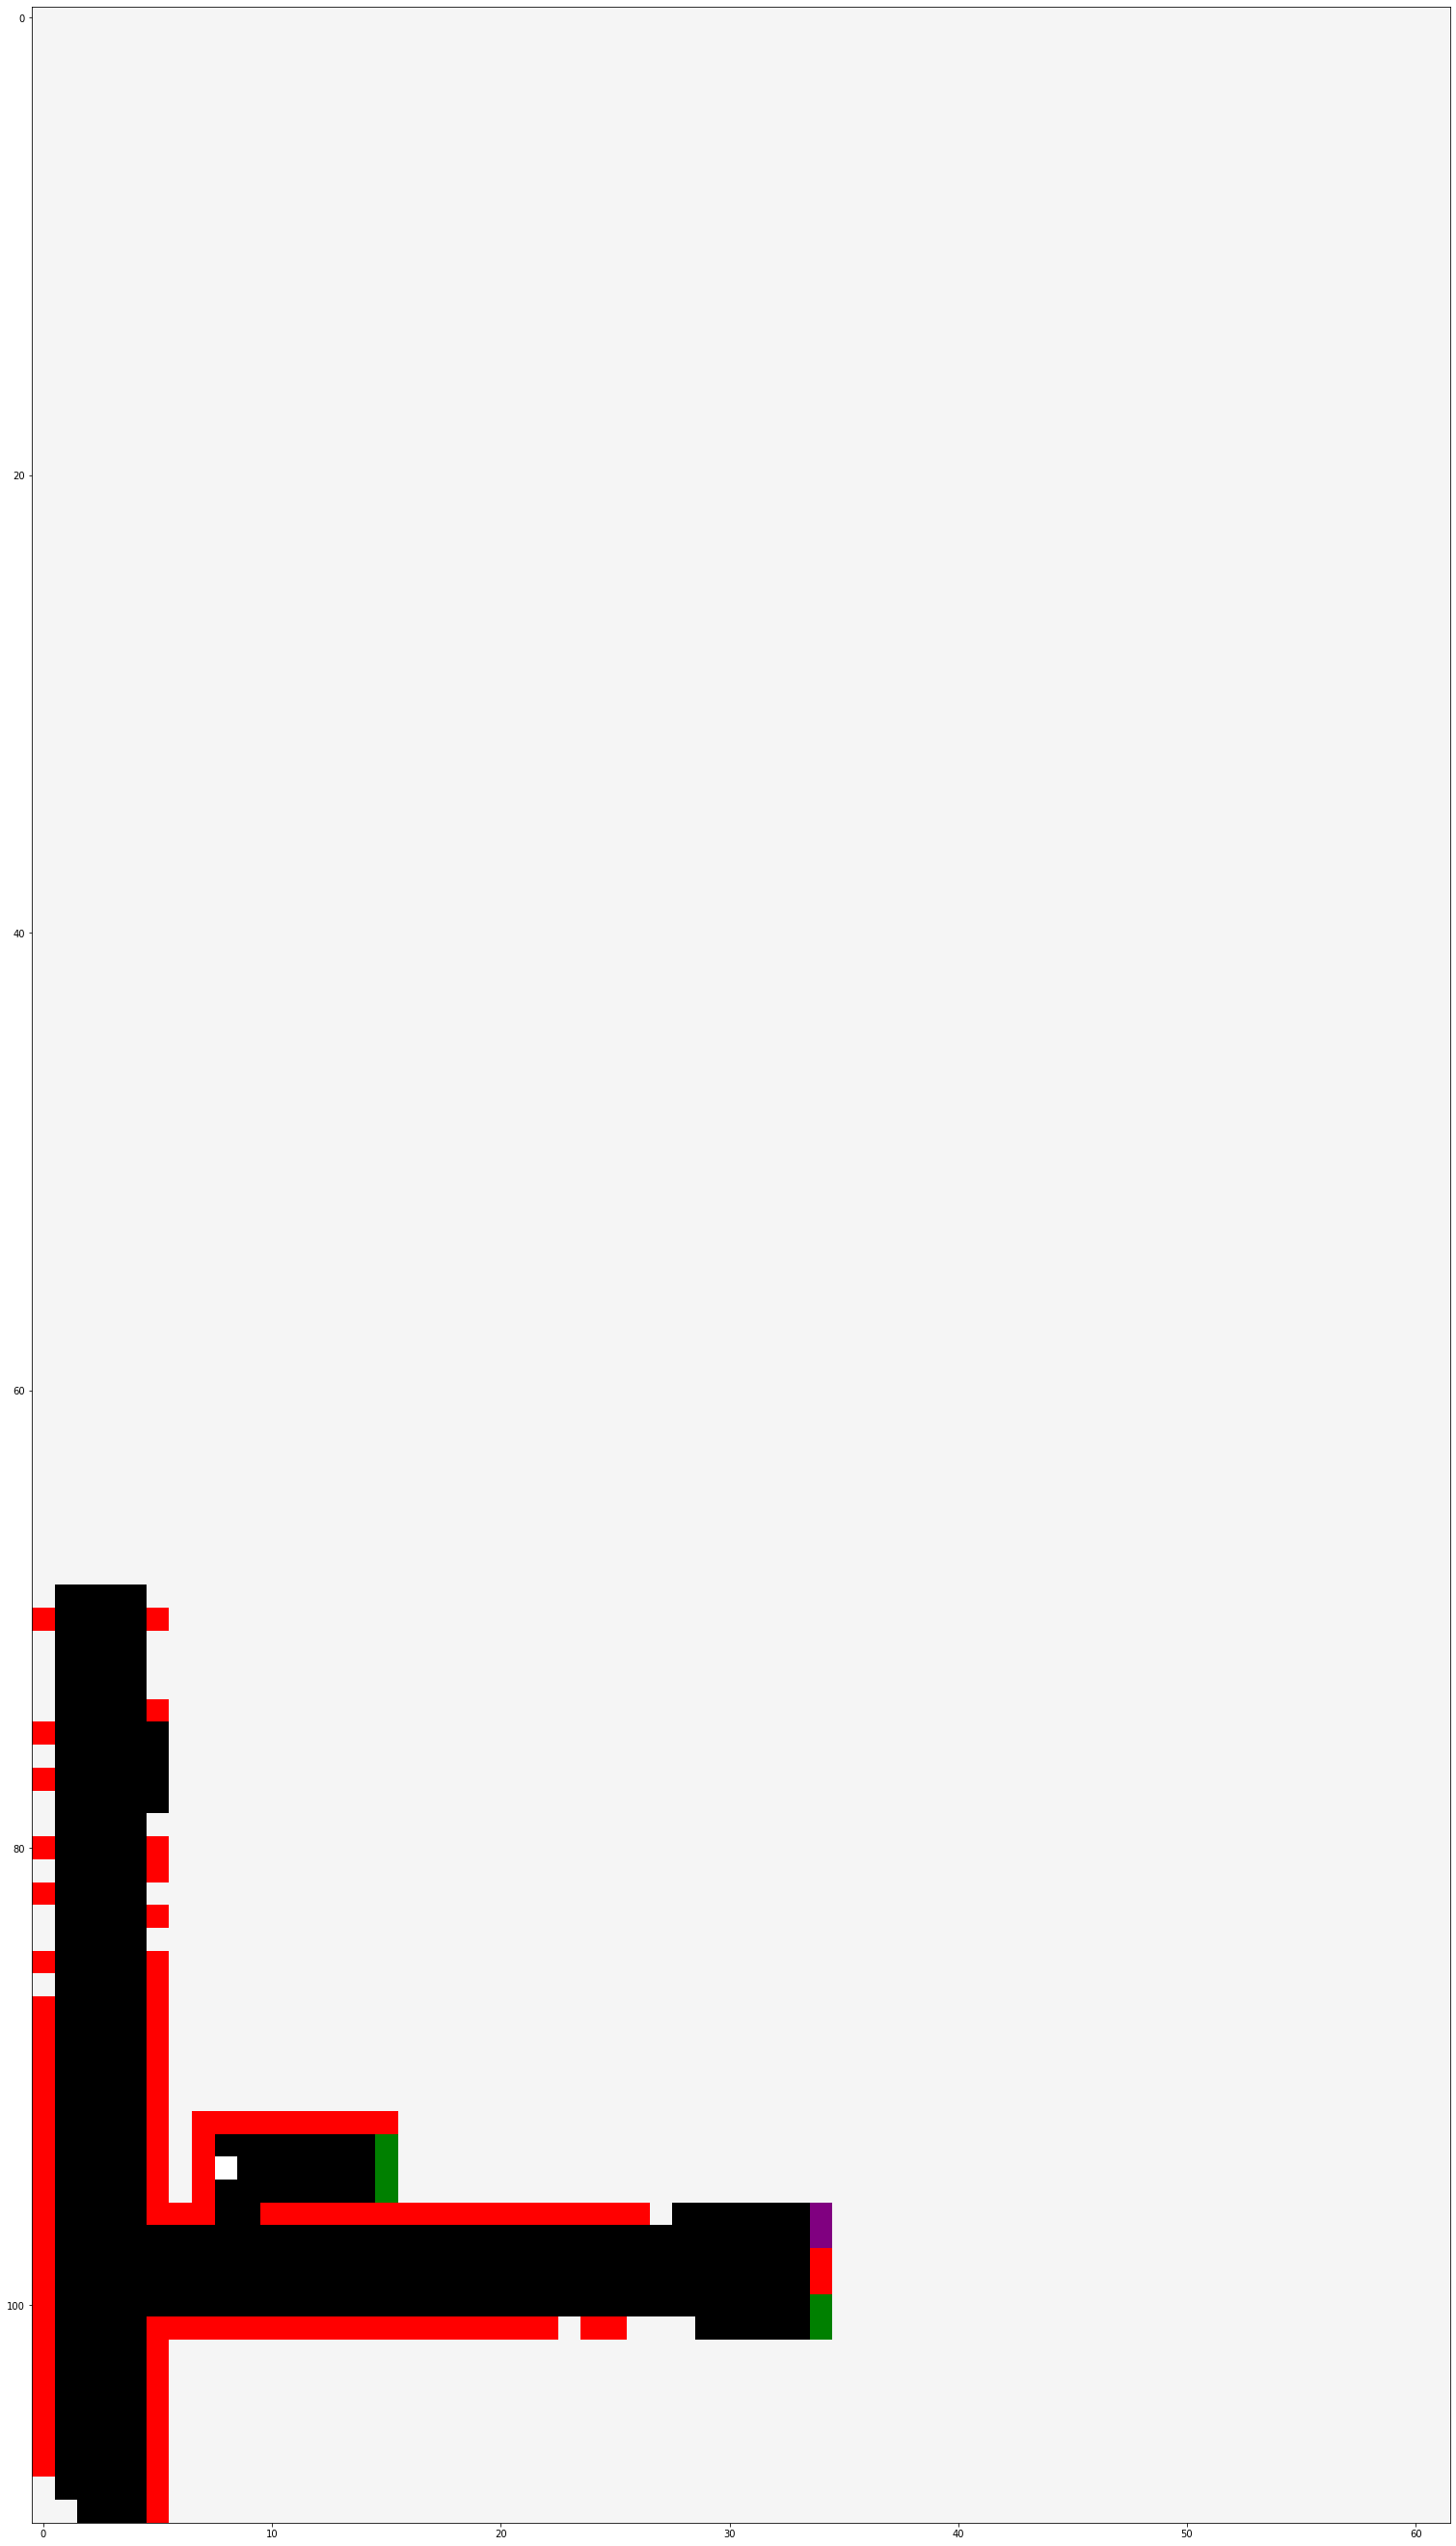

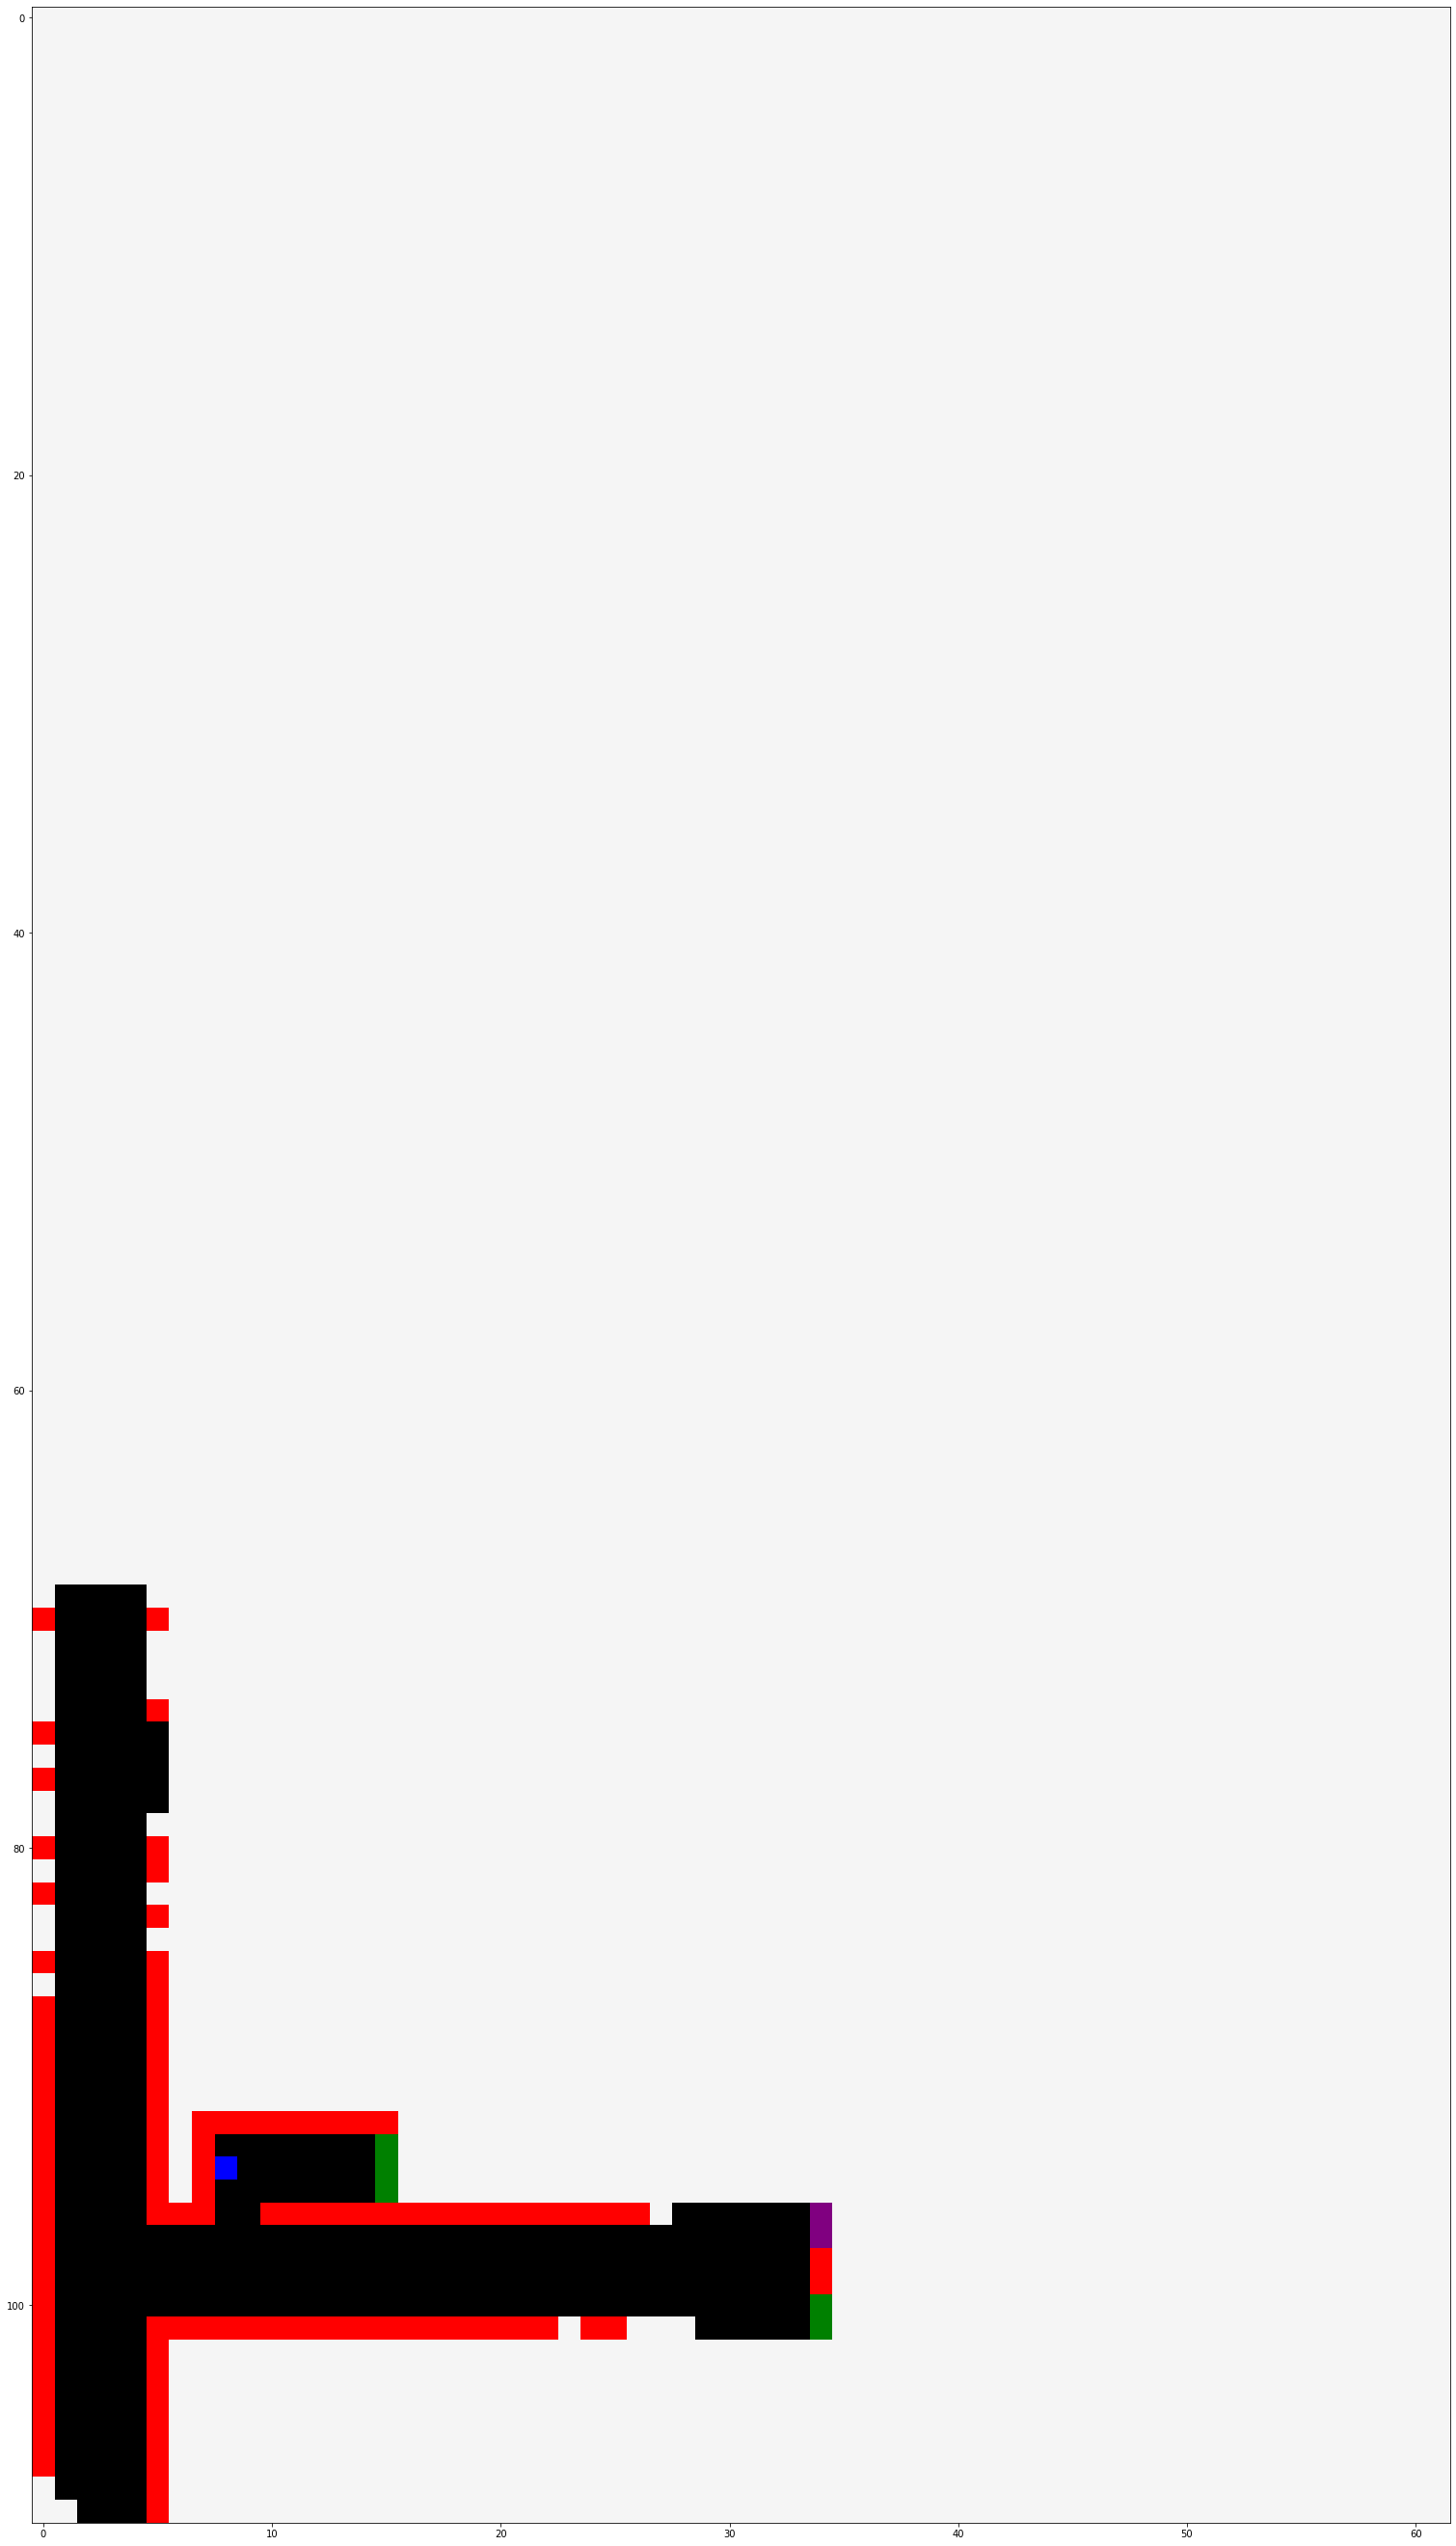

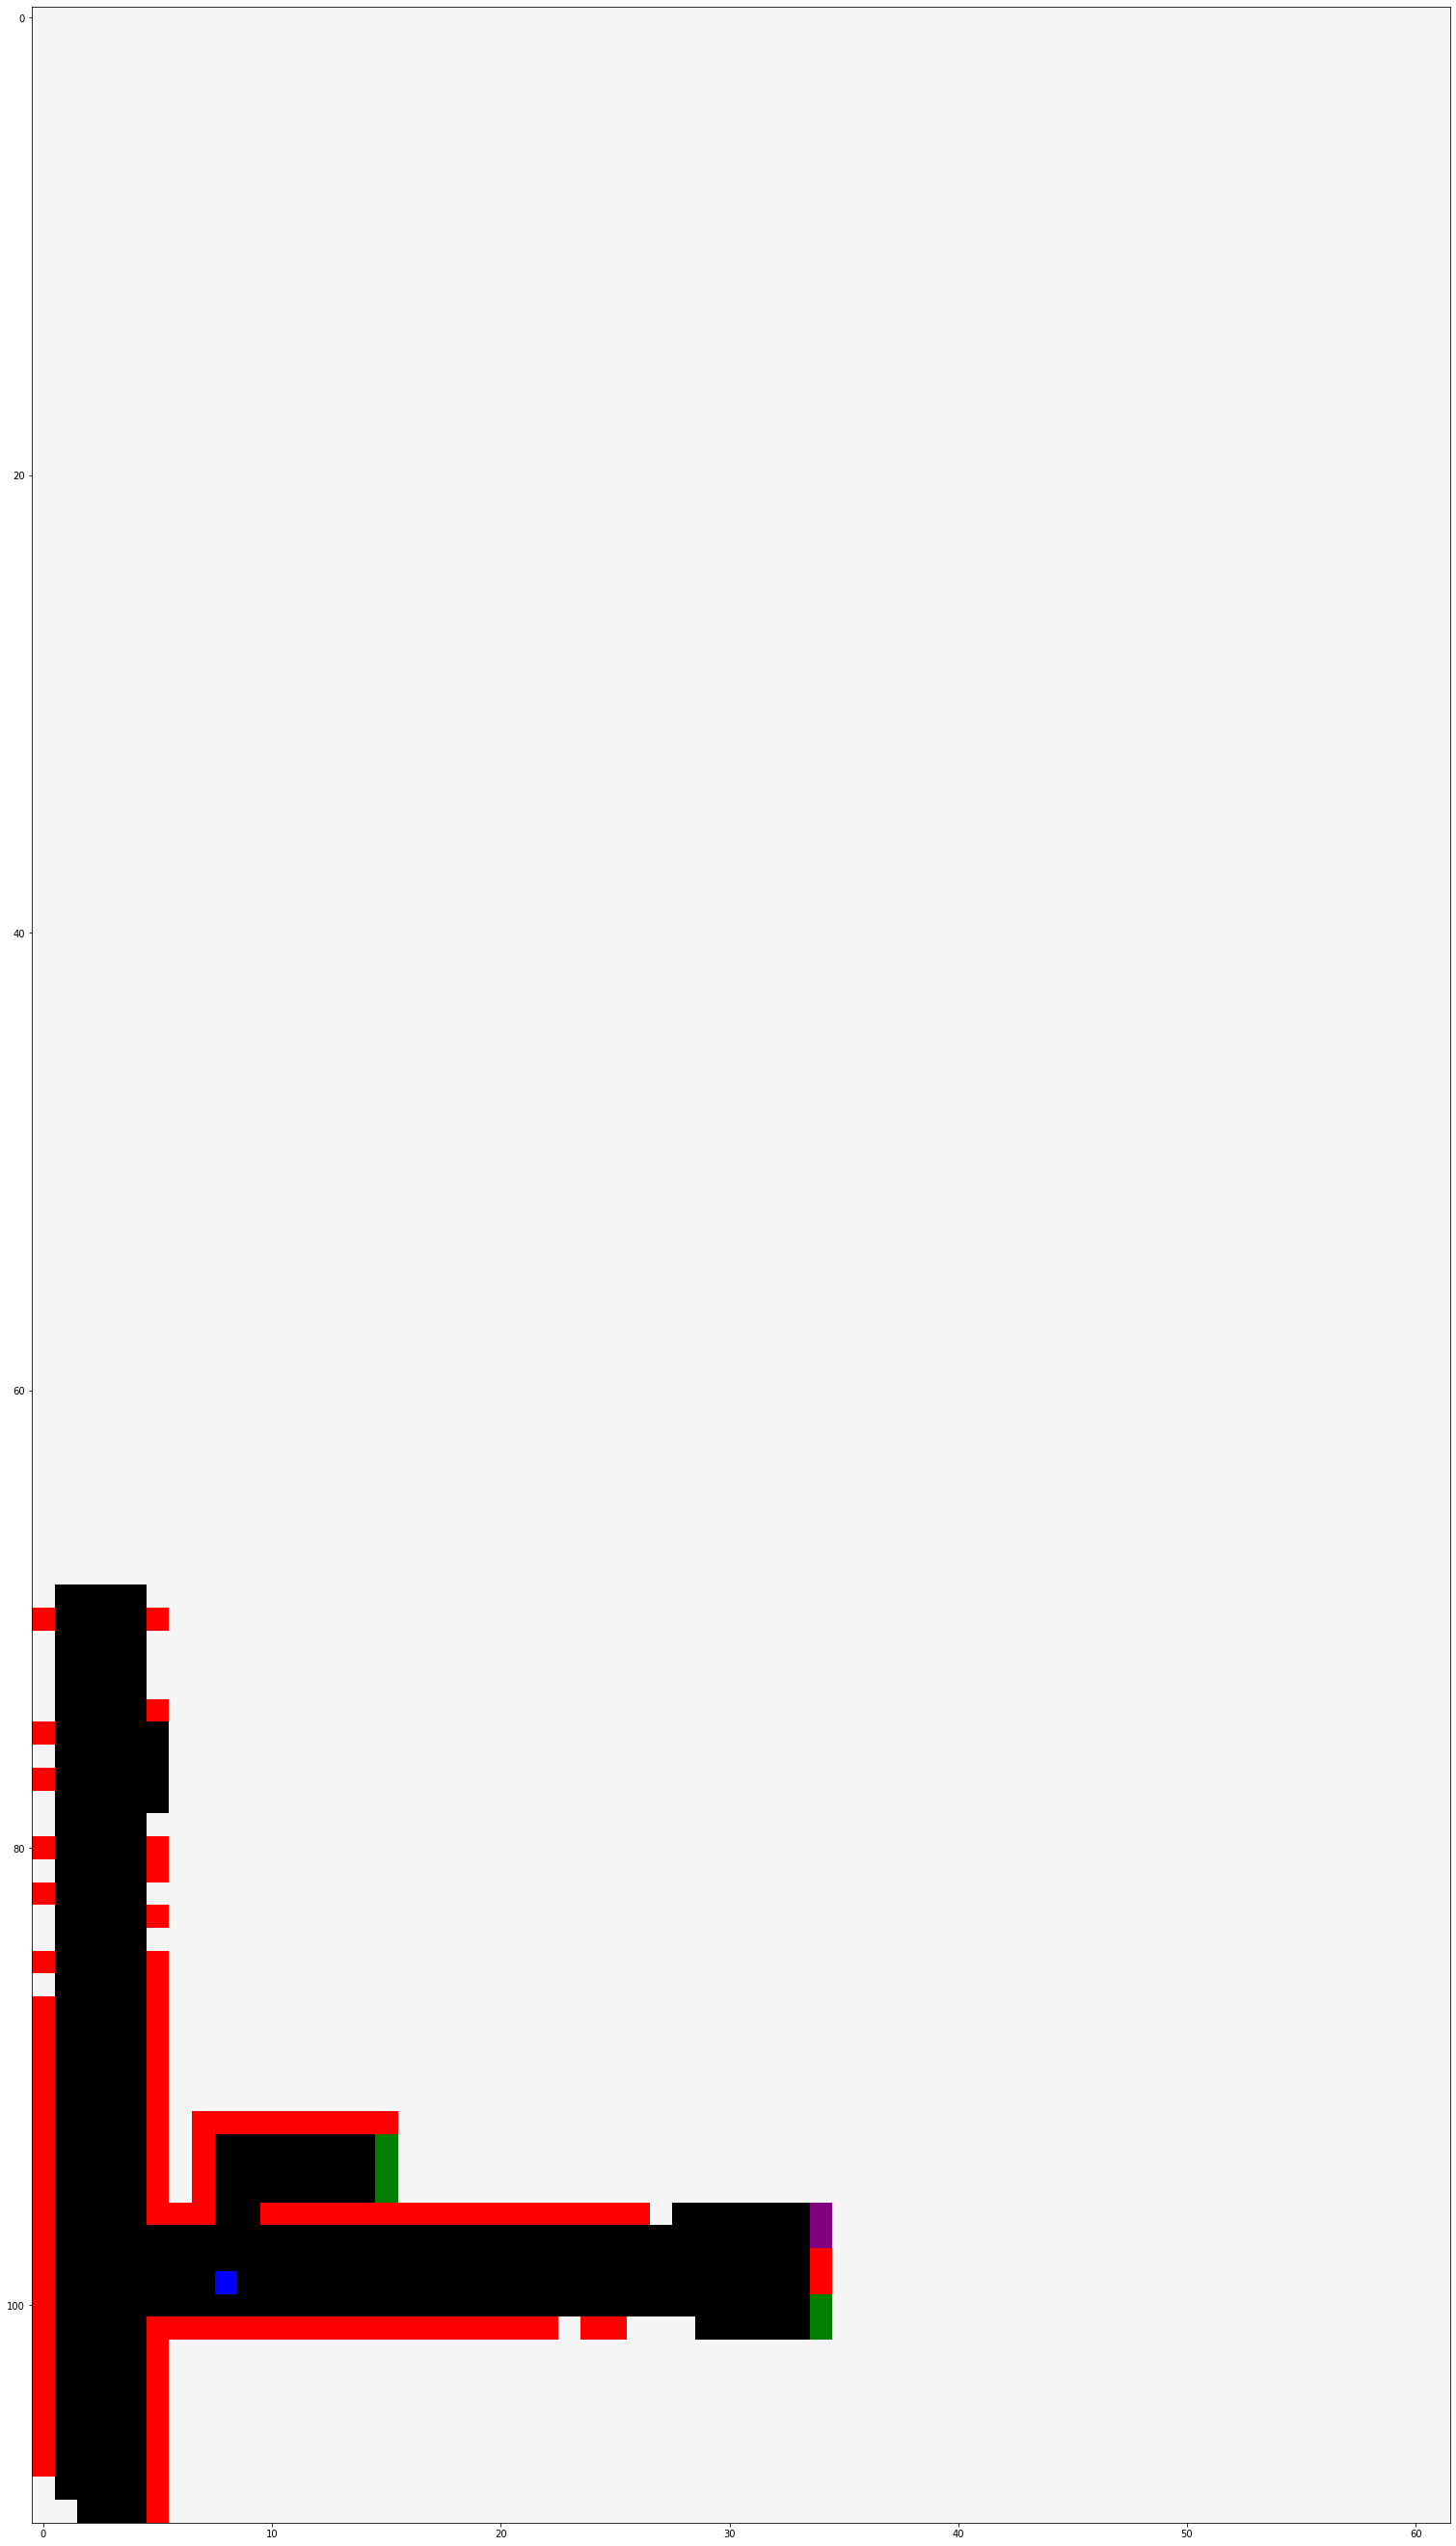

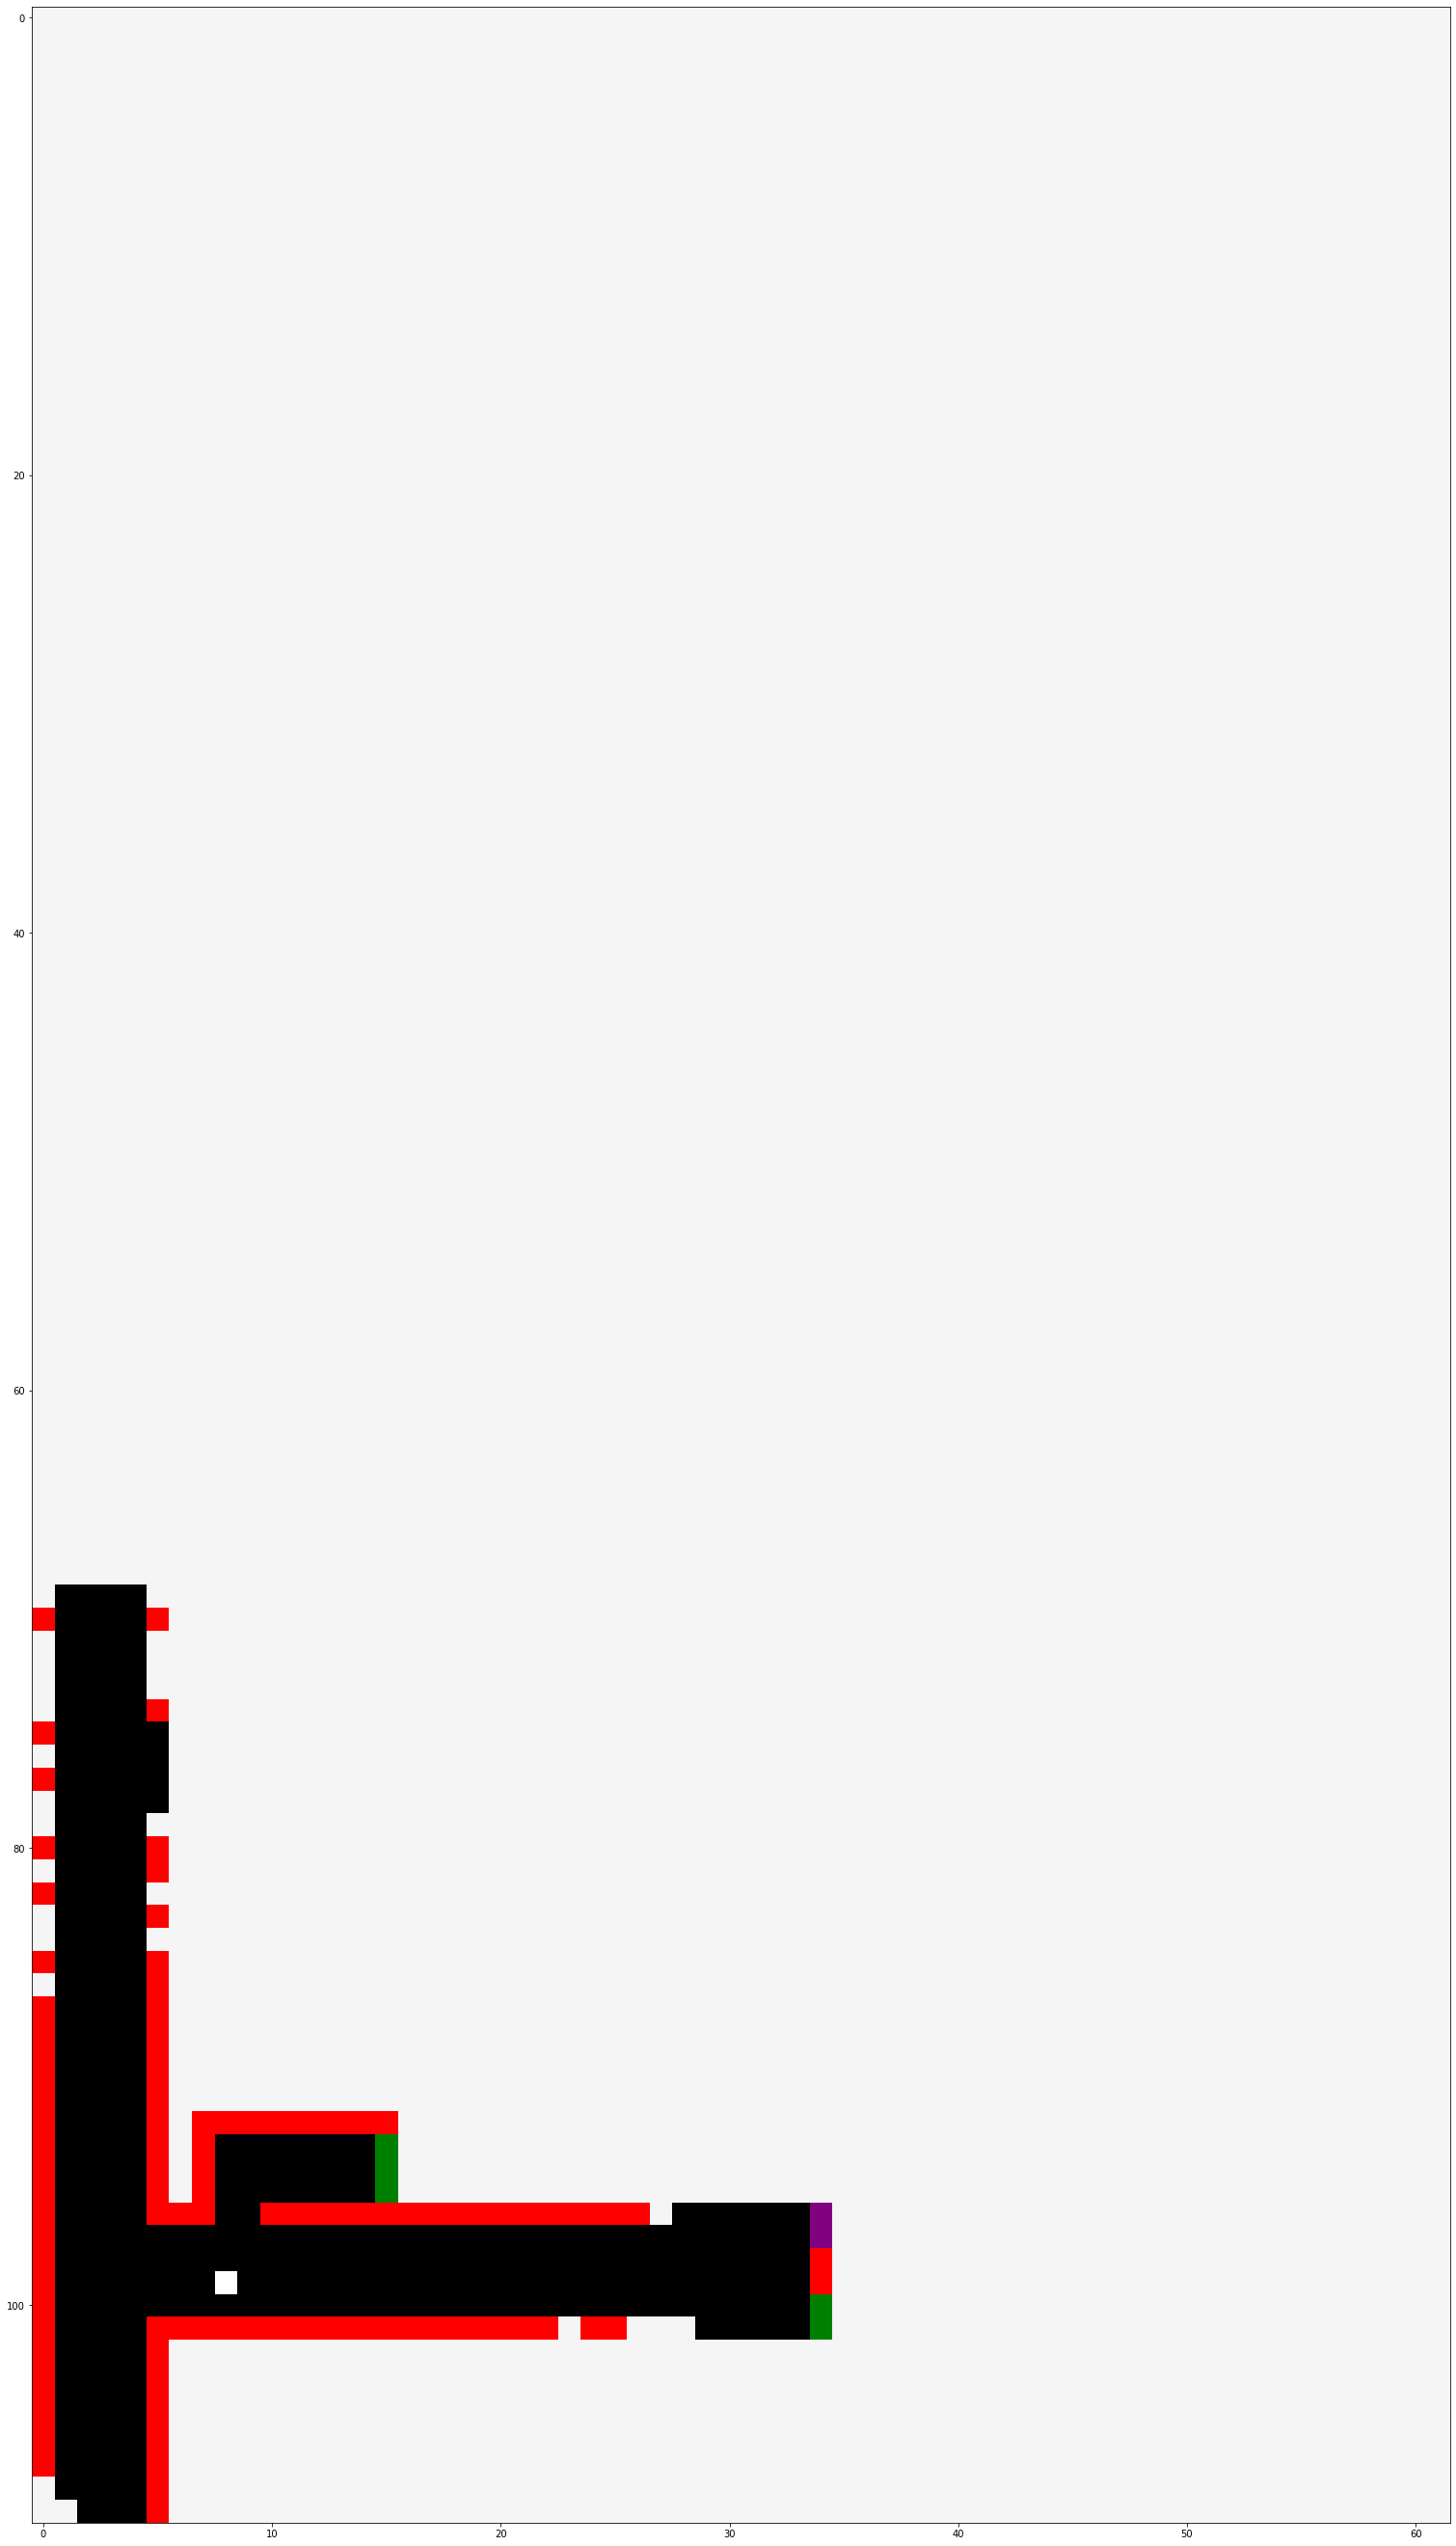

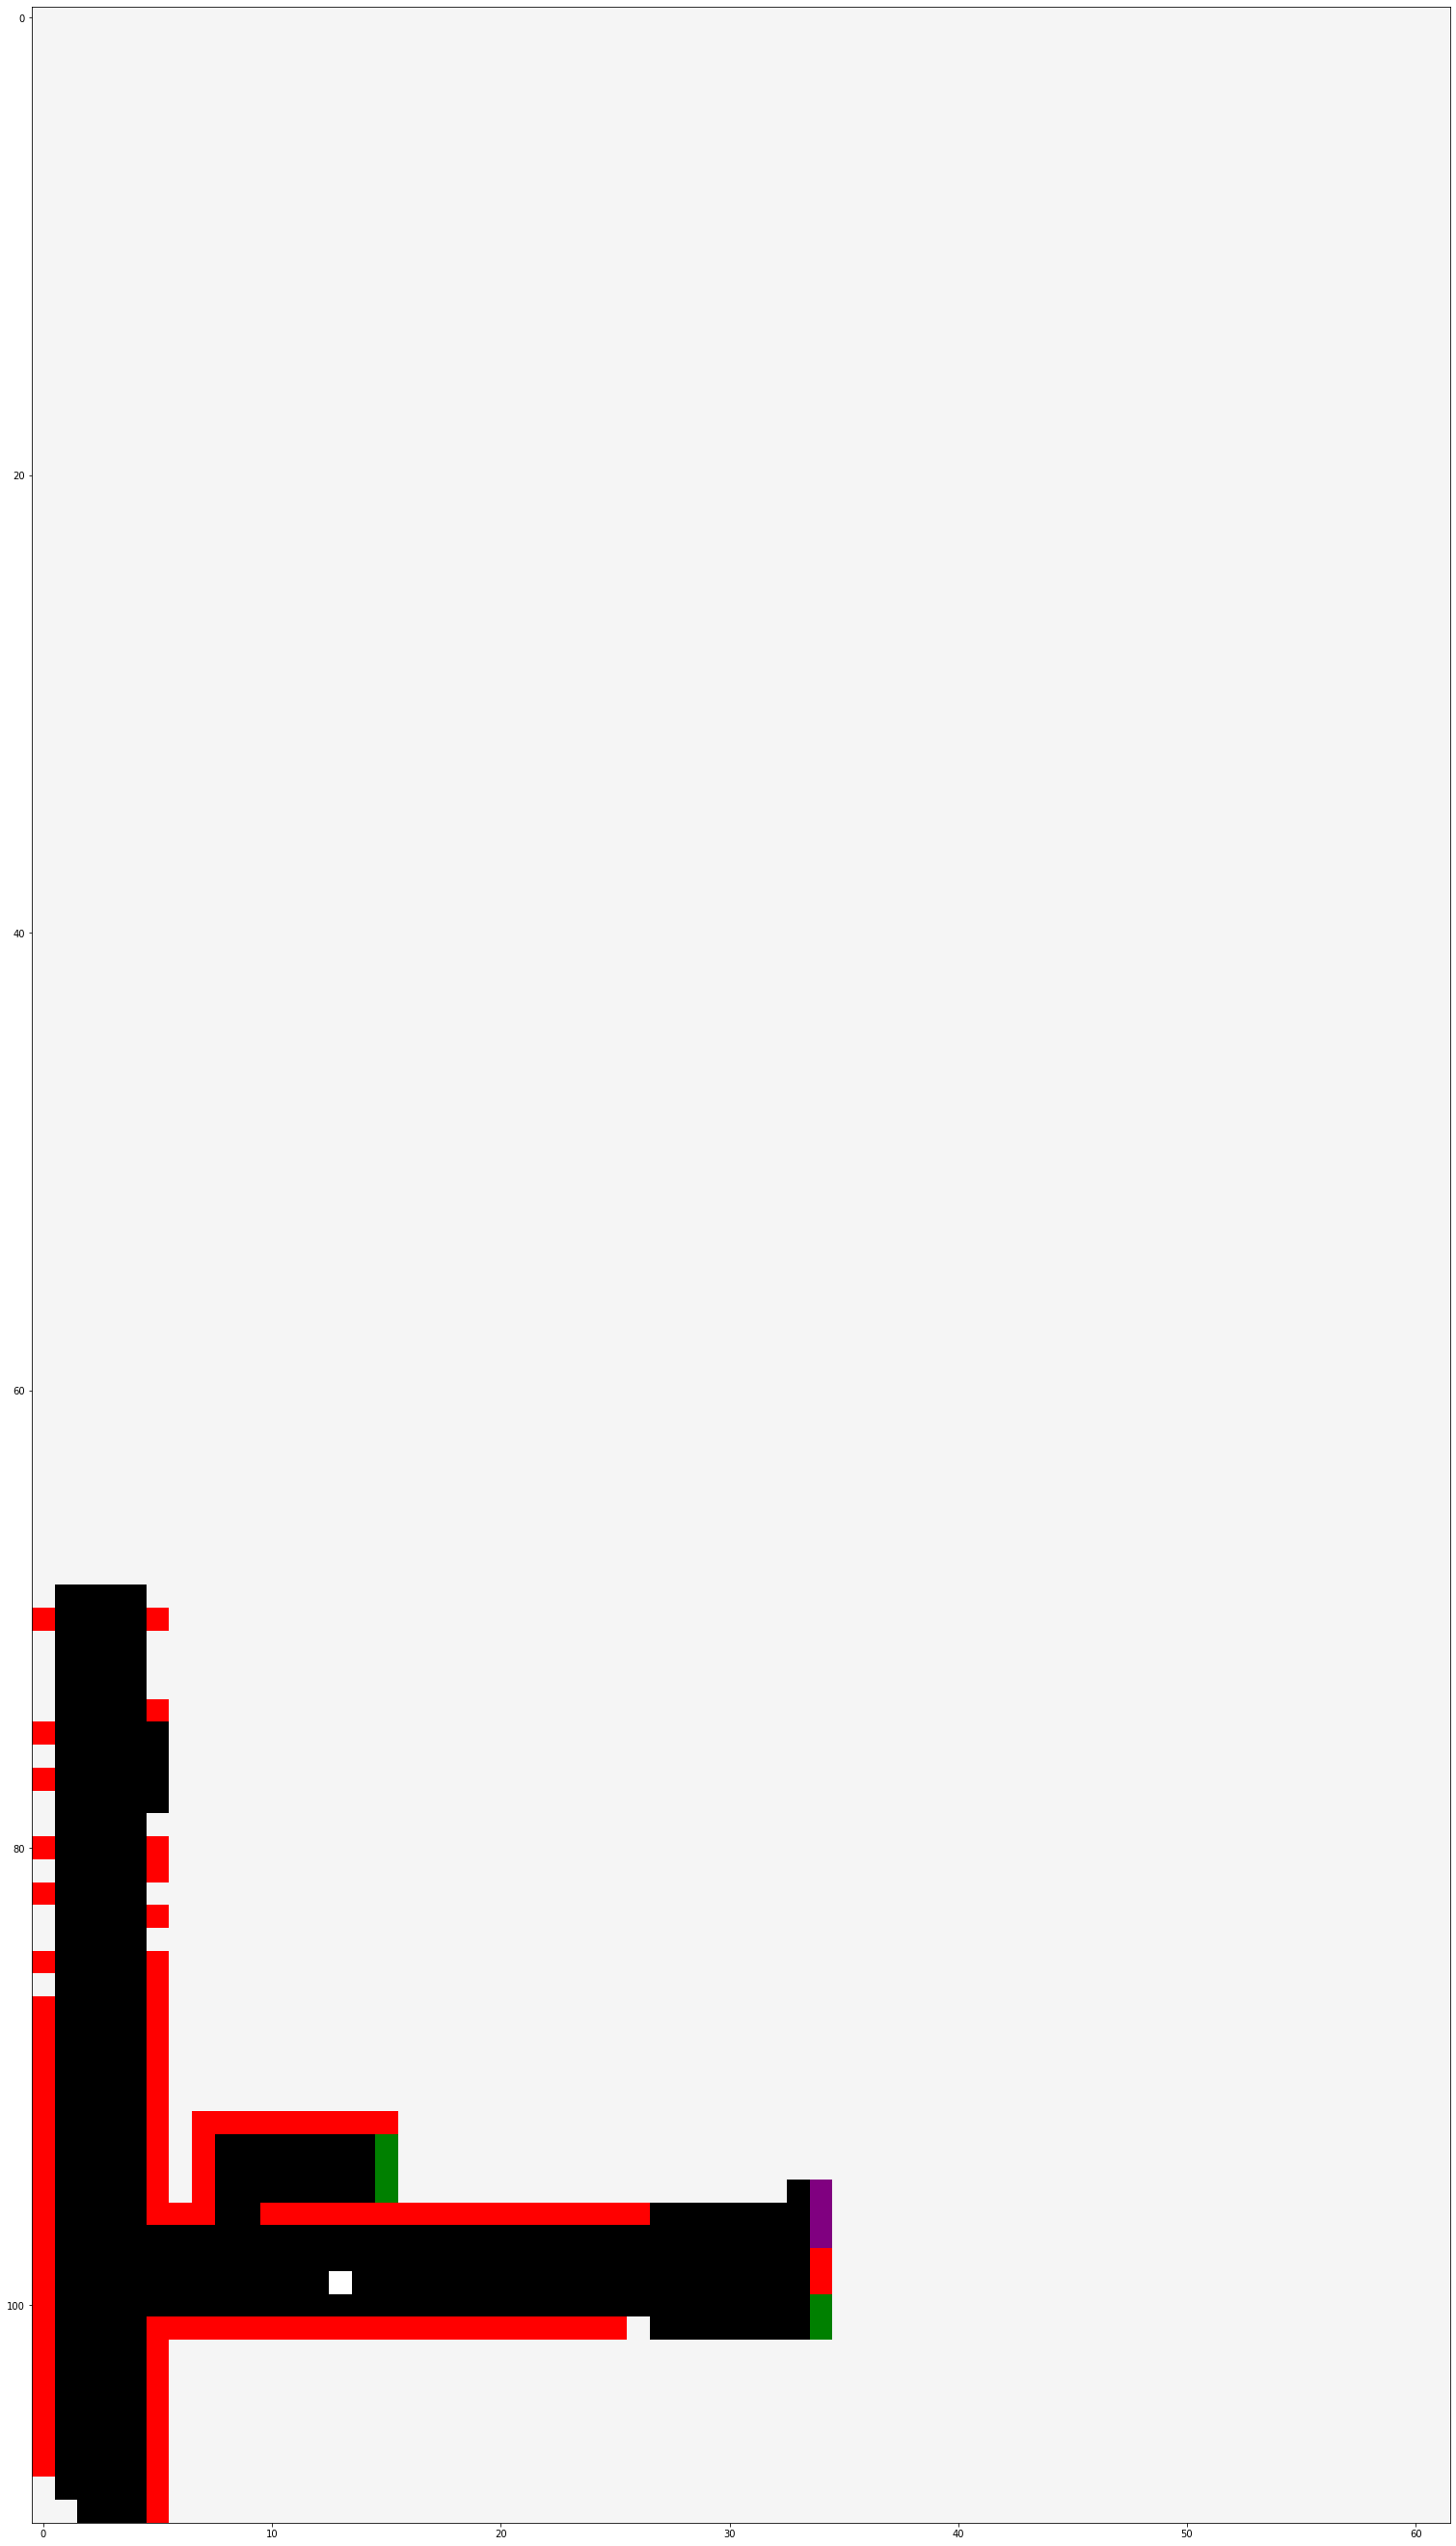

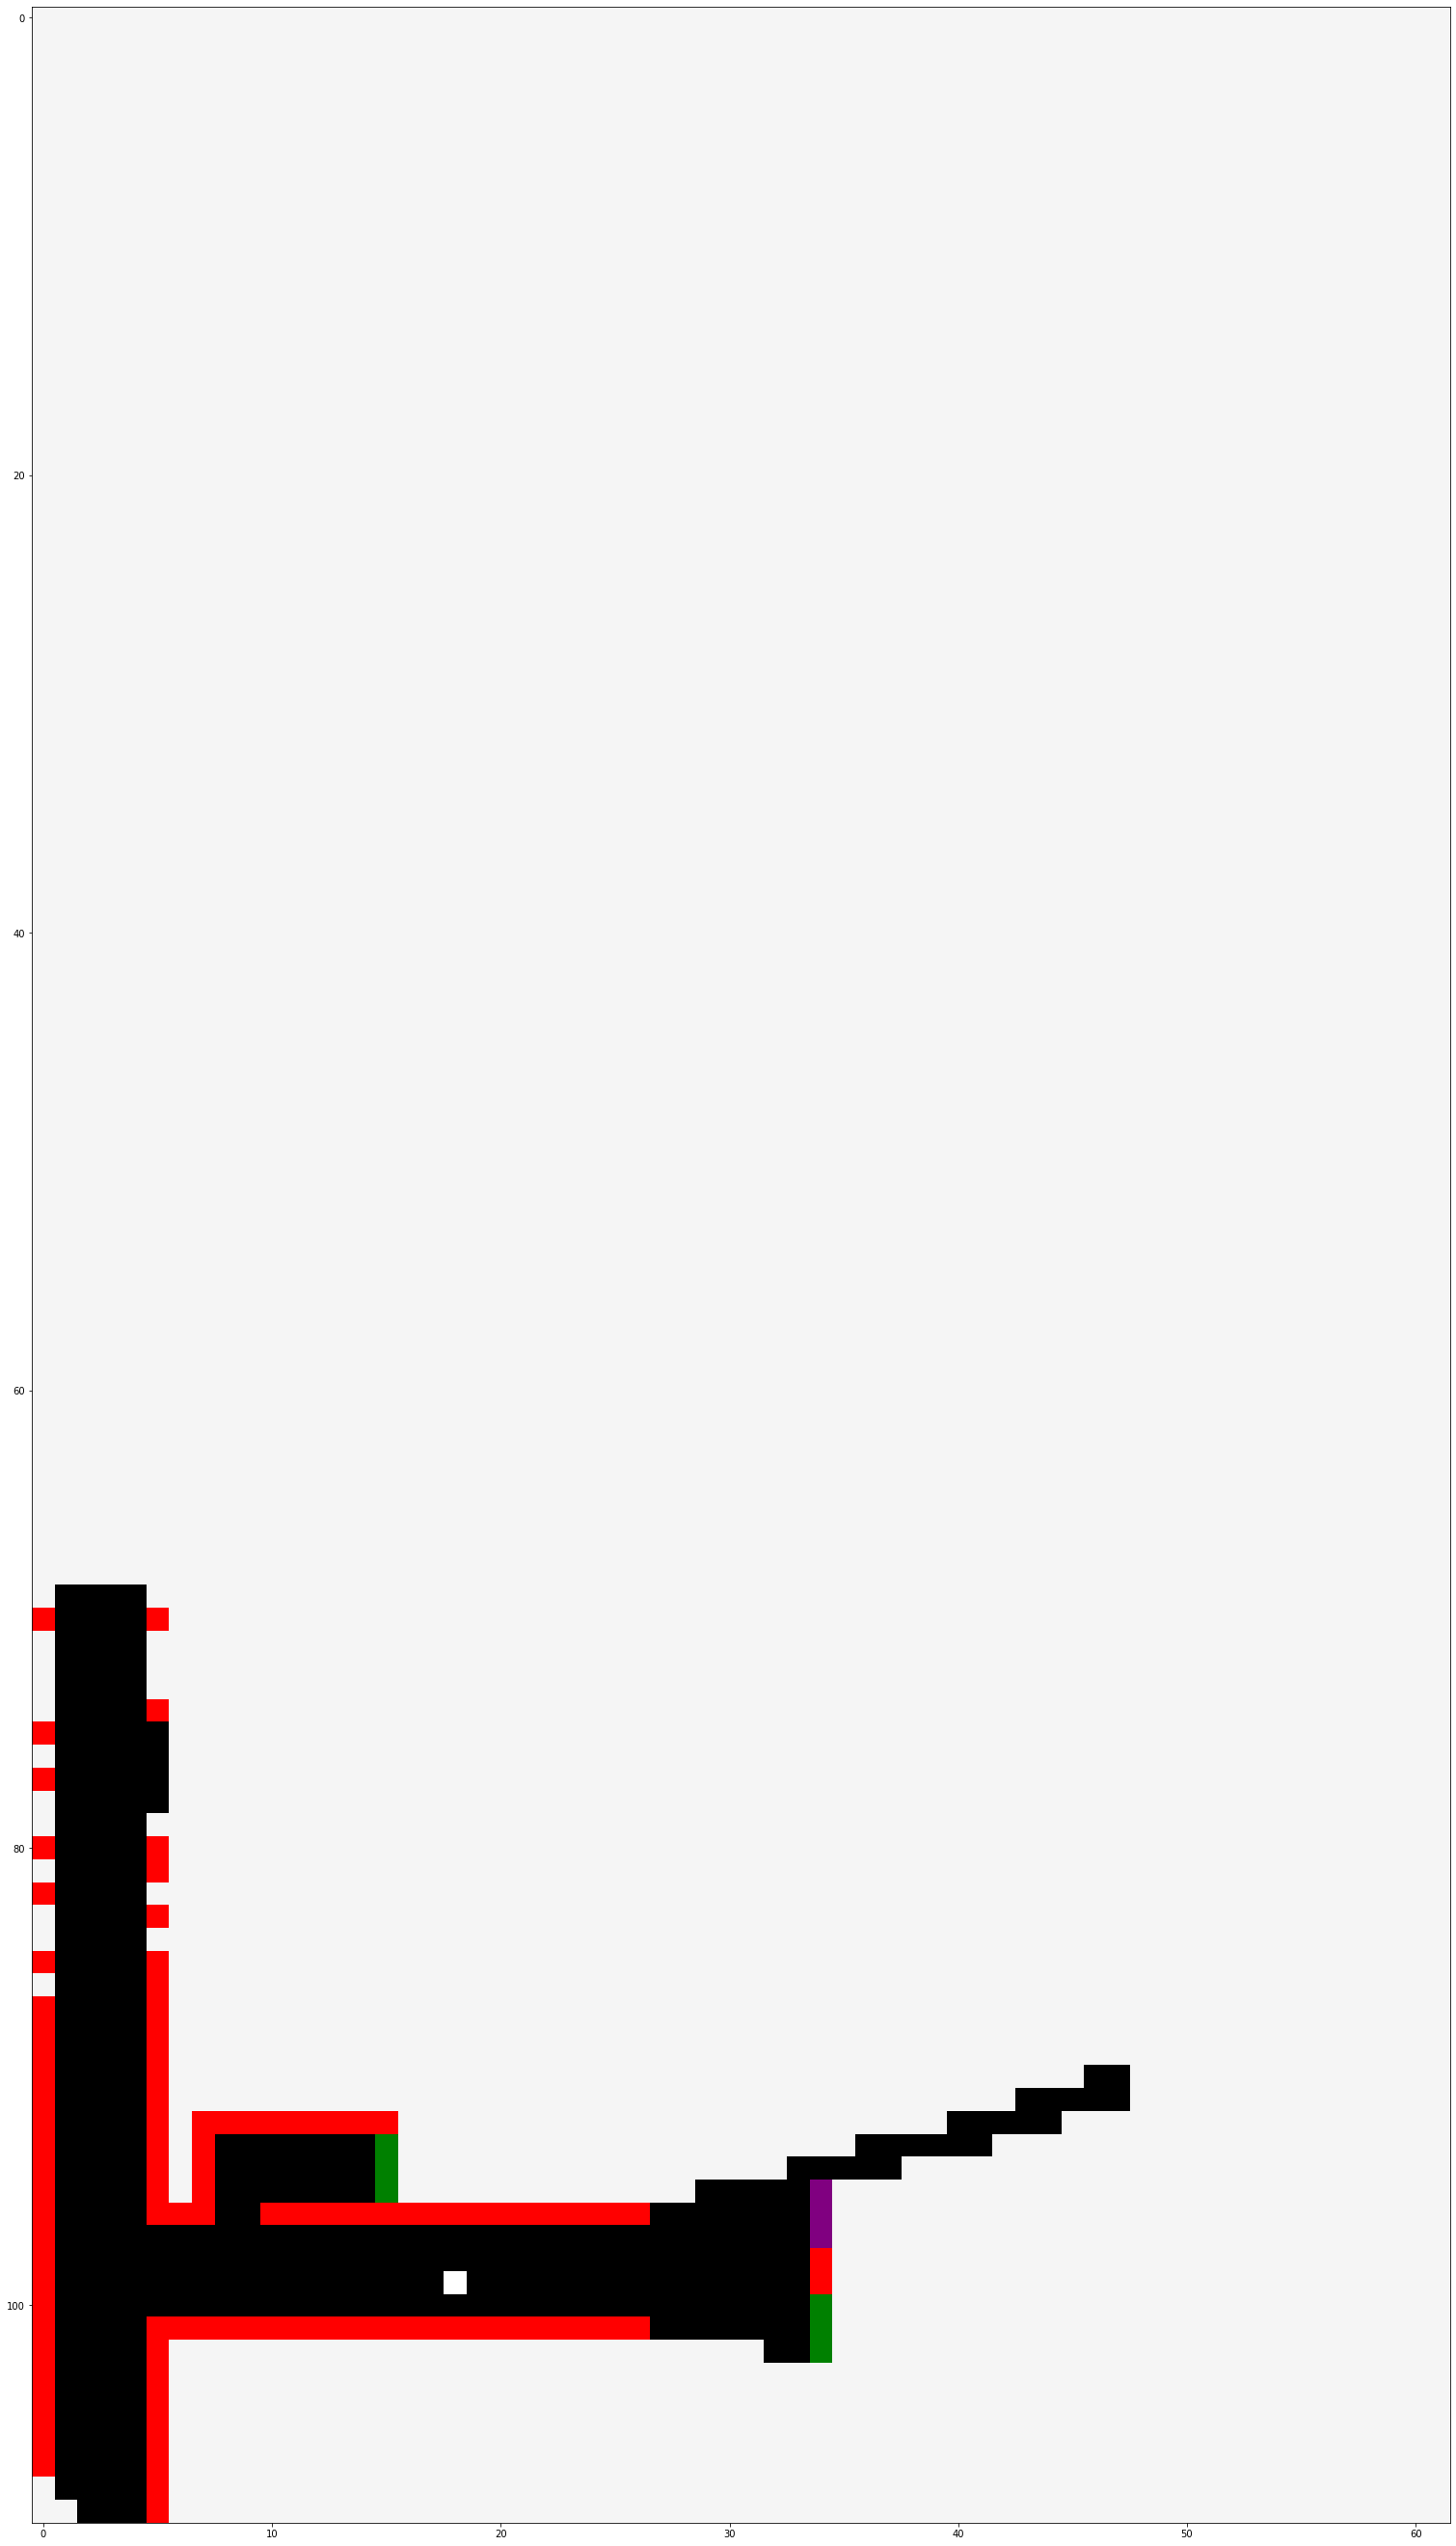

In [7]:

# debug_multi_test12

print(datas[0]['search_depth'])
real_states = datas[0]['observed_states']

infos = datas[0]['info']

count = 0
full_hyps = []

# for submaps, tophyps, observed_state, prop_dictbeliefs, maps in zip(submap_steps, tophyp_steps, real_states, prop_dicts_steps):
for info, observed_state in zip(infos, real_states):  
    state_hyps = []
    print(info['beliefs'])
    for hyp in info['tophyps']:
#         visualize(submap).show()
        WinMap = hyp
        state_hyps.append(WinMap)
        print(len(hyp))
        
    sorted_hyps = sorted(list(zip(info['beliefs'], state_hyps)), key=lambda item: item[0], reverse=True)
    print(sorted_hyps)
    full_hyps.append(list(sorted_hyp[1] for sorted_hyp in sorted_hyps))
    
    print("Step: "+str(count))
    
# print(sorted_hyps.keys())
# for hyp in full_hyps[-1]:
#     vis_single_grid(hyp)
gen_gif(real_states, hyps=full_hyps)

    
    
    

In [5]:
# visualize the belief distribution

real_states = datas[0]['observed_states']
infos = datas[0]['info']
count = 0
full_hyps = []

# for submaps, tophyps, observed_state, prop_dictbeliefs, maps in zip(submap_steps, tophyp_steps, real_states, prop_dicts_steps):
info, observed_state = list(zip(infos, real_states))[-20]
state_hyps = []
print(info['reward_maps'])
for belief, hyp in zip(info['beliefs'], info['maps']):
    if(belief>0):
        print(hyp)
        print(belief)
        visualize(hyp).show()



    
# print(sorted_hyps.keys())
# for hyp in full_hyps[-1]:
#     vis_single_grid(hyp)
# gen_gif(real_states, hyps=full_hyps)

    
    
    

[]


## Planner Heatmap

Checking spec: spatial_planning/spec_1645647257.232975.pkl
spatial_planning/spec_1645647257.232975.pkl
Checking spec: spatial_planning/spec_1645648885.0019069.pkl
spatial_planning/spec_1645648885.0019069.pkl
Checking spec: spatial_planning/spec_1645649182.15695.pkl
spatial_planning/spec_1645649182.15695.pkl
Checking spec: spatial_planning/spec_1645653581.8967352.pkl
spatial_planning/spec_1645653581.8967352.pkl
Checking spec: spatial_planning/spec_1645657027.1445136.pkl
spatial_planning/spec_1645657027.1445136.pkl
Checking spec: spatial_planning/spec_1645657836.5793257.pkl
spatial_planning/spec_1645657836.5793257.pkl
Checking spec: spatial_planning/spec_1645659624.0382698.pkl
spatial_planning/spec_1645659624.0382698.pkl
Checking spec: spatial_planning/spec_1645663497.215902.pkl
spatial_planning/spec_1645663497.215902.pkl
Checking spec: spatial_planning/spec_1645680147.8555276.pkl
spatial_planning/spec_1645680147.8555276.pkl
Checking spec: spatial_planning/spec_1645692133.2908823.pkl
spa

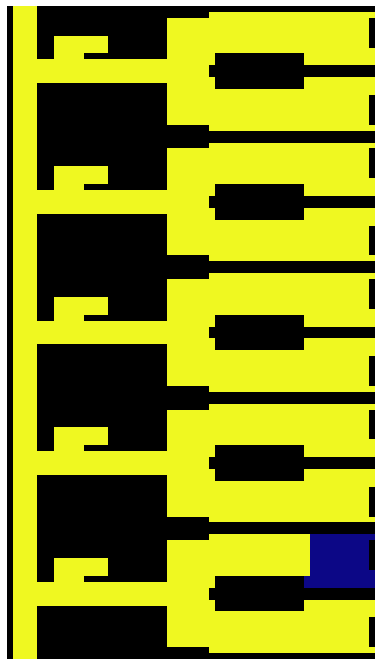

IndexError: list index out of range

In [3]:

exp_version ="exp2"
remote=False
if(exp_version == "exp1"):
    exp=["test1", 
#           "test1_Reflect", 
          "test2", 
#           "test2_Reflect", 
          "test3", 
#           "test3_Reflect", 
          "test4", 
#           "test4_Reflect", 
          "test5",
#           "test5_Reflect",
          "test6", 
#           "test6_Reflect"
        ]
elif(exp_version == "exp2"):
    exp = [
        "test7", 
            "test8", 
            "test9", 
            "test10", 
            "test11", 
            "test12"
    ]

    
modes = ["pomcp_ssp"]

all_experiment_specs = load_all_experiment_specs_minio()
for mode in modes:
    for task in exp:
        
        datas = query_specs(all_experiment_specs, lambda x: x['exp_name'] == "{}_los_{}".format(task, mode))

        cmap =  cm.get_cmap("plasma").colors

        observed_states = datas[0]['observed_states']
        real_states = datas[0]['states']
        infos = datas[0]['info']


        # Heatmaps
        real_state = real_states[-1]
        observed_state = observed_states[-1]
        sy, sx = real_state.shape

        total = np.zeros((sy, sx))

        unobserved = (observed_state == np.ones(real_state.shape)*UNOBSERVED)
        wall = (real_state == np.ones(real_state.shape)*WALL)
        for syi in range(sy):
            for sxi in range(sx):
                if(not unobserved[syi, sxi]):
                    total[syi, sxi]+=1

        # More visible distinctions
        total = total
        total = (len(cmap)-1)*total/float(np.max(total))

        total_image = np.zeros((sy, sx, 3))
        for syi in range(sy):
            for sxi in range(sx):
                if(wall[syi, sxi]):
                    total_image[syi, sxi] = (0,0,0)
                else:
                    total_image[syi, sxi] = cmap[int(total[syi, sxi])]

        f = plt.figure(figsize=(32, 12))
        plt.imshow(total_image)
        plt.axis('off')
        plt.show()
        f.savefig("./figs/{}.pdf".format(datas[0]['exp_name']), bbox_inches='tight')

([<matplotlib.axis.XTick at 0x15de5abe0>,
 [Text(0, 0, '500'),
  Text(1, 0, '1000'),
  Text(2, 0, '1500'),
  Text(3, 0, '2000'),
  Text(4, 0, '2500'),
  Text(5, 0, '3000'),
  Text(6, 0, '3500'),
  Text(7, 0, '4000'),
  Text(8, 0, '4500'),
  Text(9, 0, '5000')])

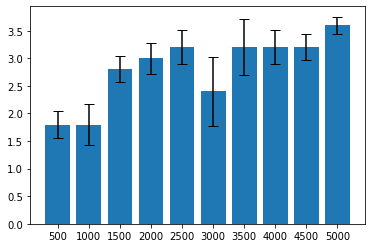

In [65]:

bins = defaultdict(list)

# Collect
for data in datas:
    bins[data['tree_queries']].append(np.sum(np.array(data['rewards'])))

# Aggregate
agg_dict = {k:sum(bins[k])/float(len(bins[k])) for k in sorted(bins.keys()) }
err_dict = {k:np.std(np.array(bins[k]))/np.sqrt(len(bins)) for k in sorted(bins.keys()) }

  
plt.bar(range(len(agg_dict)), list(agg_dict.values()),yerr=err_dict.values(), align='center', capsize=5)
plt.xticks(range(len(agg_dict)), list(agg_dict.keys()))

In [24]:
all_experiment_specs = load_all_experiment_specs_minio()
datas = query_specs(all_experiment_specs, lambda x: x['exp_name'].startswith("eval_model") )



Checking spec: spatial_planning/spec_1619895257.406701.pkl
Checking spec: spatial_planning/spec_1619897350.0192869.pkl
Checking spec: spatial_planning/spec_1619897362.6965227.pkl
Checking spec: spatial_planning/spec_1619897366.153419.pkl
Checking spec: spatial_planning/spec_1619897377.201045.pkl
Checking spec: spatial_planning/spec_1619897377.922536.pkl
Checking spec: spatial_planning/spec_1619897401.3816967.pkl
Checking spec: spatial_planning/spec_1619897408.6057973.pkl
Checking spec: spatial_planning/spec_1619897440.739204.pkl
Checking spec: spatial_planning/spec_1619897448.3109941.pkl
Checking spec: spatial_planning/spec_1619897456.5935106.pkl
Checking spec: spatial_planning/spec_1619897473.1281393.pkl
Checking spec: spatial_planning/spec_1619897544.7828448.pkl
Checking spec: spatial_planning/spec_1619897561.8451743.pkl
Checking spec: spatial_planning/spec_1619897586.739739.pkl
Checking spec: spatial_planning/spec_1619897597.1010654.pkl
Checking spec: spatial_planning/spec_161989761

Checking spec: spatial_planning/spec_1619939394.030776.pkl
Checking spec: spatial_planning/spec_1619939410.6641204.pkl
Checking spec: spatial_planning/spec_1619939553.621015.pkl
Checking spec: spatial_planning/spec_1619940893.158168.pkl
Checking spec: spatial_planning/spec_1619940895.7805297.pkl
Checking spec: spatial_planning/spec_1619941070.9274929.pkl
Checking spec: spatial_planning/spec_1619941461.0163171.pkl
Checking spec: spatial_planning/spec_1619941894.3730342.pkl
Checking spec: spatial_planning/spec_1619942580.1065052.pkl
Checking spec: spatial_planning/spec_1619942594.5232322.pkl
Checking spec: spatial_planning/spec_1619942648.5478513.pkl
Checking spec: spatial_planning/spec_1619942657.80555.pkl
Checking spec: spatial_planning/spec_1619942681.7113135.pkl
Checking spec: spatial_planning/spec_1619945075.82928.pkl
Checking spec: spatial_planning/spec_1619946415.8256378.pkl
Checking spec: spatial_planning/spec_1619946461.191146.pkl
Checking spec: spatial_planning/spec_1619947281.

In [89]:
def process_key(datas, key):
    if(key == "percent_observed"):
        for i in range(len(datas)):
            datas[i][key] = 100*np.count_nonzero(datas[i]['observed_states'][-1]==6)/(np.array(datas[i]['observed_states']).shape[0]*np.array(datas[i]['observed_states']).shape[1])
    if(key == "normalized_reward"):
        for i in range(len(datas)):
            datas[i][key] = np.sum(np.array(datas[i]['rewards']))/np.count_nonzero(datas[i]['states'][0]==2)
    if(key == "path_length"):
        for i in range(len(datas)):
            datas[i][key] = len(datas[i]['observed_states'])
    return datas

(5,)
(5,)


<ipython-input-92-b89c9aa9045e>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( [""]+list(agg_dict_1.keys()) )


Text(0.5, 1.0, 'path length')

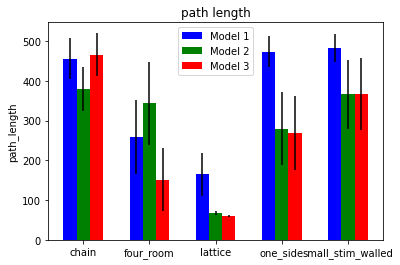

In [92]:
# Model comparison
bins_model1 = defaultdict(list)
bins_model2 = defaultdict(list)
bins_model3 = defaultdict(list)

proc_datas = process_key(datas, "percent_observed")
proc_datas = process_key(datas, "normalized_reward")
proc_datas = process_key(datas, "path_length")

key = "path_length"
# Collect
for data in proc_datas:
    if(data['task_name'] != "discovery"):
        if(data['exp_name'] == "eval_model_1_attempt_1"):
            bins_model1[data['task_name']].append(np.sum(np.array(data[key])))
        elif(data['exp_name'] == "eval_model_2_attempt_1"):
            bins_model2[data['task_name']].append(np.sum(np.array(data[key])))
        elif(data['exp_name'] == "eval_model_3_attempt_1"):
            bins_model3[data['task_name']].append(np.sum(np.array(data[key])))

# Aggregate
def bin_dict(bins):
    agg_dict = {k:sum(bins[k])/float(len(bins[k])) for k in sorted(bins.keys()) }
    err_dict = {k:np.std(np.array(bins[k]))/np.sqrt(len(bins)) for k in sorted(bins.keys()) }
    return agg_dict, err_dict

agg_dict_1, err_dict_1 = bin_dict(bins_model1) 
agg_dict_2, err_dict_2 = bin_dict(bins_model2) 
agg_dict_3, err_dict_3 = bin_dict(bins_model3) 
  
ax = plt.subplot(111)

xs = np.array(range(len(agg_dict_1)))
print(np.array(range(len(agg_dict_1))).shape)
print(np.array(range(len(agg_dict_2))).shape)
ax.bar(xs-0.2, list(agg_dict_1.values()), width=0.2, yerr=err_dict_1.values(), color='b', align='center')
ax.bar(xs    , list(agg_dict_2.values()), width=0.2, yerr=err_dict_2.values(), color='g', align='center')
ax.bar(xs+0.2, list(agg_dict_3.values()), width=0.2, yerr=err_dict_3.values(), color='r', align='center')

ax.set_xticklabels( [""]+list(agg_dict_1.keys()) )

plt.ylabel(key)
plt.legend(["Model 1", "Model 2", "Model 3"])
plt.title("path length")